<a href="https://colab.research.google.com/github/Claptar/spatialMPFC/blob/main/Enrichment%20analysis/mammals/ssGSEA_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and files

## Install dependencies

In [1]:
!python --version

Python 3.10.11


In [ ]:
!pip install scanpy[leiden] PyComplexHeatmap --quiet

import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.0 MB/s eta 0:00:00


## Imports

In [1]:
import warnings
import scanpy as sc

import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

Нужно подключить свой гугл диск

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = 'drive/MyDrive/Spatial project/data/'

In [4]:
de_dir_path = 'drive/MyDrive/Spatial project/results/enrichment/mammals/'

In [5]:
os.listdir(de_dir_path)

['anova_zscore.csv', 'ttest_zscore.csv']

### DE results

In [6]:
anova_res = pd.read_csv(de_dir_path + 'anova_zscore.csv', index_col=0)
anova_res.head()

sum_sq    df         F  \
Term|NES                                                                
AXL+ Dendritic Cell CL0000451               12.651538  12.0  1.649240   
AXL+ Myeloid Dendritic Cell CL0000782       12.243486  12.0  1.813330   
AXL+ Plasmacytoid Dendritic Cell CL0000784   9.442357  12.0  0.891036   
Acinar CL0002064                            16.410512  12.0  1.946963   
Activated Stellate CL0002410                 5.746399  12.0  2.331796   

                                              PR(>F)  p_val_adj  
Term|NES                                                         
AXL+ Dendritic Cell CL0000451               0.096825   0.141882  
AXL+ Myeloid Dendritic Cell CL0000782       0.061596   0.098807  
AXL+ Plasmacytoid Dendritic Cell CL0000784  0.559672   0.592799  
Acinar CL0002064                            0.042189   0.072814  
Activated Stellate CL0002410                0.013720   0.033680

In [7]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_zscore.csv', index_col=0)
ttest_res.head()

cell_type layer group1 group2     score  \
0          Activated Stellate CL0002410    L1  human  chimp -2.055534   
1    Airway Smooth Muscle UBERON0004225    L1  human  chimp -1.939796   
2  Alveolar Epithelial Type 2 CL0002063    L1  human  chimp -1.824175   
3         Alveolar Fibroblast CL0000057    L1  human  chimp -1.380239   
4                  Artery UBERON0001637    L1  human  chimp -1.493480   

     pvalue  p_val_adj  
0  0.085584   0.324783  
1  0.100470   0.337251  
2  0.117936   0.354689  
3  0.216734   0.489764  
4  0.185925   0.438351

## Load pseudobulks

In [8]:
pb_dir_path = 'drive/MyDrive/Spatial project/data/enrichment/'

In [9]:
os.listdir(pb_dir_path)

['ssgsea_azimuth_ct.csv', 'ssGSEA_zscore.h5ad']

In [10]:
adata_en = sc.read_h5ad(pb_dir_path + 'ssGSEA_zscore.h5ad')
adata_en.var = anova_res
adata_en

AnnData object with n_obs × n_vars = 94 × 340
    obs: 'layer', 'sample_id', 'condition'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'condition_colors', 'layer_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Результаты ANOVA

## Число генов и р-value

In [11]:
anova_cell_types = anova_res[anova_res.p_val_adj < 0.05].index
adata_en.var['anova_sign'] = adata_en.var['p_val_adj'] < 0.05
anova_cell_types

Index(['Activated Stellate CL0002410', 'Airway Smooth Muscle UBERON0004225',
       'Alveolar Epithelial Type 2 CL0002063', 'Alveolar Fibroblast CL0000057',
       'Artery UBERON0001637', 'Astrocyte 1 CL0000127', 'B CL0000236',
       'Basal CL0000646', 'Bronchial Vessel 1 CL0002328',
       'Bronchial Vessel CL0002328',
       ...
       'VIP+ HSPB6+ Layer 1-3 GABAergic Neuron CL0000617',
       'VIP+ HTR3A+ Layer 1-2 GABAergic Neuron CL0000617',
       'VIP+ SCML4+ Layer 1-2 GABAergic Neuron CL0000617',
       'VIP+ SLC7A6OS+ Layer 1-6 GABAergic Neuron CL0000617',
       'VIP+ SMOC1+ Layer 1-5 GABAergic Neuron CL0000617',
       'VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617',
       'VIP+ WNT4+ Layer 1-2 GABAergic Neuron CL0000617',
       'Vascular Smooth Muscle CL0000359', 'Vip+ GABAergic Neuron 2 CL0000617',
       'Vip+ GABAergic Neuron 3 CL0000617'],
      dtype='object', name='Term|NES', length=174)

<Axes: >

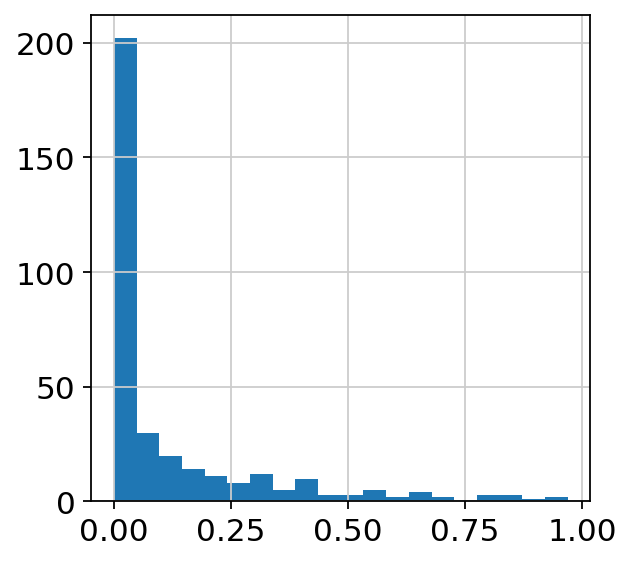

In [12]:
anova_res['PR(>F)'].hist(bins=20)

## Клеточные типы значимые для человека

In [13]:
ttest_res.head()

cell_type layer group1 group2     score  \
0          Activated Stellate CL0002410    L1  human  chimp -2.055534   
1    Airway Smooth Muscle UBERON0004225    L1  human  chimp -1.939796   
2  Alveolar Epithelial Type 2 CL0002063    L1  human  chimp -1.824175   
3         Alveolar Fibroblast CL0000057    L1  human  chimp -1.380239   
4                  Artery UBERON0001637    L1  human  chimp -1.493480   

     pvalue  p_val_adj  
0  0.085584   0.324783  
1  0.100470   0.337251  
2  0.117936   0.354689  
3  0.216734   0.489764  
4  0.185925   0.438351

Оставим только значимые различия с человеком

In [14]:
human_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & (ttest_res.group1 == 'human')]
human_specific

cell_type layer group1   group2  \
122  RORB+ MED8+ Layer 5 Glutamatergic Neuron CL000...    L1  human    chimp   
148                   Sncg+ GABAergic Neuron CL0000617    L1  human    chimp   
184                                    CD4 T CL0000624    L1  human  macaque   
298  RORB+ PTPN3+ Layer 2-3 Glutamatergic Neuron CL...    L1  human  macaque   
302  SST+ C4orf26+ Layer 5-6 GABAergic Neuron CL000...    L1  human  macaque   
..                                                 ...   ...    ...      ...   
316   SST+ PRRT4+ Layer 1-2 GABAergic Neuron CL0000617    WM  human  macaque   
317  SST+ RPL35AP11+ Layer 5 GABAergic Neuron CL000...    WM  human  macaque   
319                 Sncg+ GABAergic Neuron 2 CL0000617    WM  human  macaque   
329  THEMIS+ ENPEP+ Layer 3 Glutamatergic Neuron CL...    WM  human  macaque   
340   VIP+ SCML4+ Layer 1-2 GABAergic Neuron CL0000617    WM  human  macaque   

        score    pvalue  p_val_adj  
122  6.670796  0.000549   0.040962  
148  7.195530  0.000365   0.031716  
184  7.278846  0.000166   0.022178  
298 -8.941528  0.000045   0.011615  
302 -7.249873  0.000170   0.022178  
..        ...       ...        ...  
316  5.916197  0.000590   0.017101  
317  5.915641  0.000590   0.017101  
319  7.645904  0.000122   0.007050  
329  4.855364  0.001845   0.037041  
340  6.803823  0.000252   0.010976  

[88 rows x 7 columns]

## Посчитаем число значимых клеточных типов для каждого вида

In [15]:
# посчитаем число уникальных клеточных типов
human_specific_cell_types = human_specific.cell_type.unique().tolist()
adata_en.var['ttest_sign'] = False
adata_en.var.loc[human_specific_cell_types, 'ttest_sign'] = True
len(human_specific_cell_types)

62

### Построим барплот числа генов по слоям

In [16]:
count_df = human_specific.groupby('layer', group_keys=True, as_index=False).cell_type.value_counts()
count_df['cond'] = count_df['count'].map({1: 'cond', 2: 'both'})
count_df.set_index('cell_type', inplace=True)
count_df.head()

layer  count  cond
cell_type                                                            
Sncg+ GABAergic Neuron CL0000617                      L1      2  both
CD4 T CL0000624                                       L1      1  cond
RORB+ MED8+ Layer 5 Glutamatergic Neuron CL0000679    L1      1  cond
SST+ PAWR+ Layer 5-6 GABAergic Neuron CL0000617       L1      1  cond
SST+ KLHL1+ Layer 5-6 GABAergic Neuron CL0000617      L1      1  cond

In [41]:
count_df[count_df.cond == 'both']

layer  count  cond
cell_type                                                            
Sncg+ GABAergic Neuron CL0000617                      L1      2  both
RORB+ PTPN3+ Layer 2-3 Glutamatergic Neuron CL0...    L3      2  both
Myeloid Dendritic Type 2 CL0000782                    WM      2  both
RORB+ PTPN3+ Layer 2-3 Glutamatergic Neuron CL0...    WM      2  both
Layer 6B Glutamatergic Neuron CL0000679               WM      2  both

In [39]:
count_df.to_csv('ttest_sign_cell_types.csv')

In [40]:
for layer in ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'WM']:
    cell_types = count_df[(count_df['count'] == 1) & (count_df['layer'] == layer)].index.tolist()
    conditions = human_specific[(human_specific.cell_type.isin(cell_types)) & (human_specific.layer == layer)].copy()
    conditions.set_index('cell_type', inplace=True)
    count_df.loc[(count_df.index.isin(cell_types)) & (count_df.layer == layer), ['cond']] = conditions.group2

<Axes: xlabel='layer', ylabel='count'>

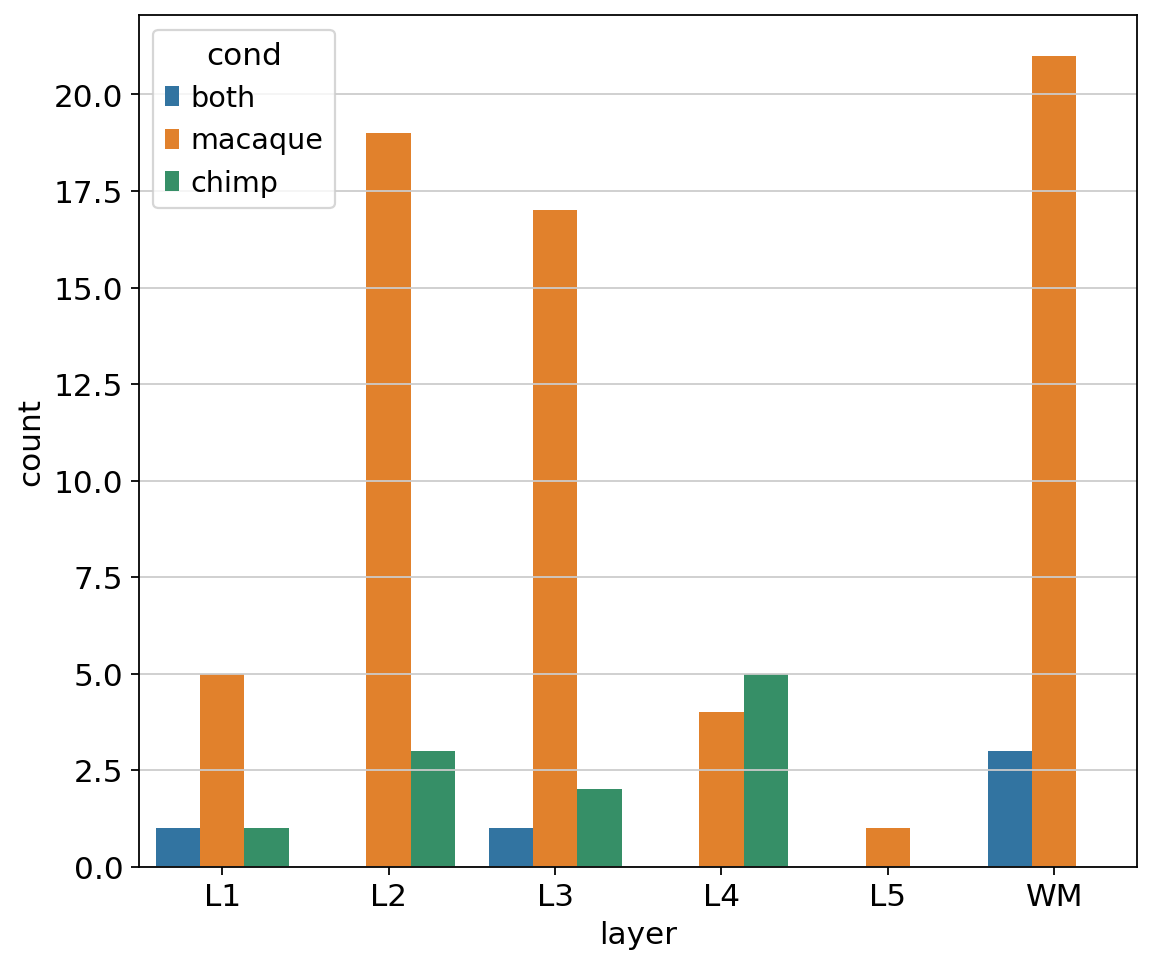

In [18]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.countplot(data=count_df, x="layer", hue='cond', ax=ax)

In [19]:
count_df.to_csv('ssGSEA_human_sig_cell_types.csv')

## Визуализация

### PCA

In [20]:
df = pd.DataFrame(adata_en.X, columns=adata_en.var_names, index=adata_en.obs_names)
df.head()

Term|NES      AXL+ Dendritic Cell CL0000451  \
WM.human_759                       0.319937   
WM.human_j12                       1.287302   
WM.human_j3                        0.980242   
WM.human_j4                        1.390315   
WM.human_j6                       -0.269762   

Term|NES      AXL+ Myeloid Dendritic Cell CL0000782  \
WM.human_759                              -0.513679   
WM.human_j12                               1.238087   
WM.human_j3                                0.474261   
WM.human_j4                                1.449872   
WM.human_j6                               -0.182845   

Term|NES      AXL+ Plasmacytoid Dendritic Cell CL0000784  Acinar CL0002064  \
WM.human_759                                    1.749483          0.673036   
WM.human_j12                                   -1.641918         -0.799067   
WM.human_j3                                    -0.133705         -0.093398   
WM.human_j4                                    -1.790560          0.374551   
WM.human_j6                                    -0.667394         -0.254269   

Term|NES      Activated Stellate CL0002410  Adventitial Fibroblast CL0000057  \
WM.human_759                     -0.062993                         -0.369015   
WM.human_j12                      1.552774                          1.493044   
WM.human_j3                       1.950841                          1.672847   
WM.human_j4                       1.699583                          1.906769   
WM.human_j6                      -0.160963                          0.042216   

Term|NES      Airway Smooth Muscle UBERON0004225  Alpha Islet Cell CL0000171  \
WM.human_759                           -0.507017                   -0.679130   
WM.human_j12                            1.580366                   -1.541365   
WM.human_j3                             2.031239                    1.020566   
WM.human_j4                             1.653457                   -1.367815   
WM.human_j6                             0.087024                   -1.017671   

Term|NES      Alveolar Epithelial Type 1 CL0002062  \
WM.human_759                             -1.736802   
WM.human_j12                              0.520593   
WM.human_j3                               1.182623   
WM.human_j4                               0.651658   
WM.human_j6                               0.752894   

Term|NES      Alveolar Epithelial Type 2 CL0002063  ...  \
WM.human_759                              0.208553  ...   
WM.human_j12                             -0.310020  ...   
WM.human_j3                              -0.309218  ...   
WM.human_j4                              -0.264849  ...   
WM.human_j6                               0.270021  ...   

Term|NES      VIP+ WNT4+ Layer 1-2 GABAergic Neuron CL0000617  \
WM.human_759                                        -0.923648   
WM.human_j12                                        -1.002977   
WM.human_j3                                          0.009653   
WM.human_j4                                          0.033645   
WM.human_j6                                          0.442951   

Term|NES      VIP+ ZIM2-AS1+ Layer 3-6 GABAergic Neuron CL0000617  \
WM.human_759                                          -0.959693     
WM.human_j12                                          -1.075601     
WM.human_j3                                           -1.316075     
WM.human_j4                                           -1.324596     
WM.human_j6                                           -1.050750     

Term|NES      Vascular Lepotomeningeal Cell CL2000043  \
WM.human_759                                -0.803623   
WM.human_j12                                 1.352934   
WM.human_j3                                  1.443587   
WM.human_j4                                  2.142222   
WM.human_j6                                 -0.116261   

Term|NES      Vascular Smooth Muscle CL0000359  Vein UBERON0001638  \
WM.human_759                          0.140906          

In [21]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = samples.sort_values()
    order_laminar = order[order.str.contains('L')].tolist()
    order_wm = order[order.str.contains('WM')].tolist()
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]
adata_en = adata_en[sample_order['all']]

In [22]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(adata_en.X.T)

In [23]:
fig = px.scatter(components, x=0, y=1, color=adata_en.var['anova_sign'], hover_name=adata_en.var_names)
fig.show()

# Кластеризация всех значимых клеточных типов

## Иерархическая кластеризация

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



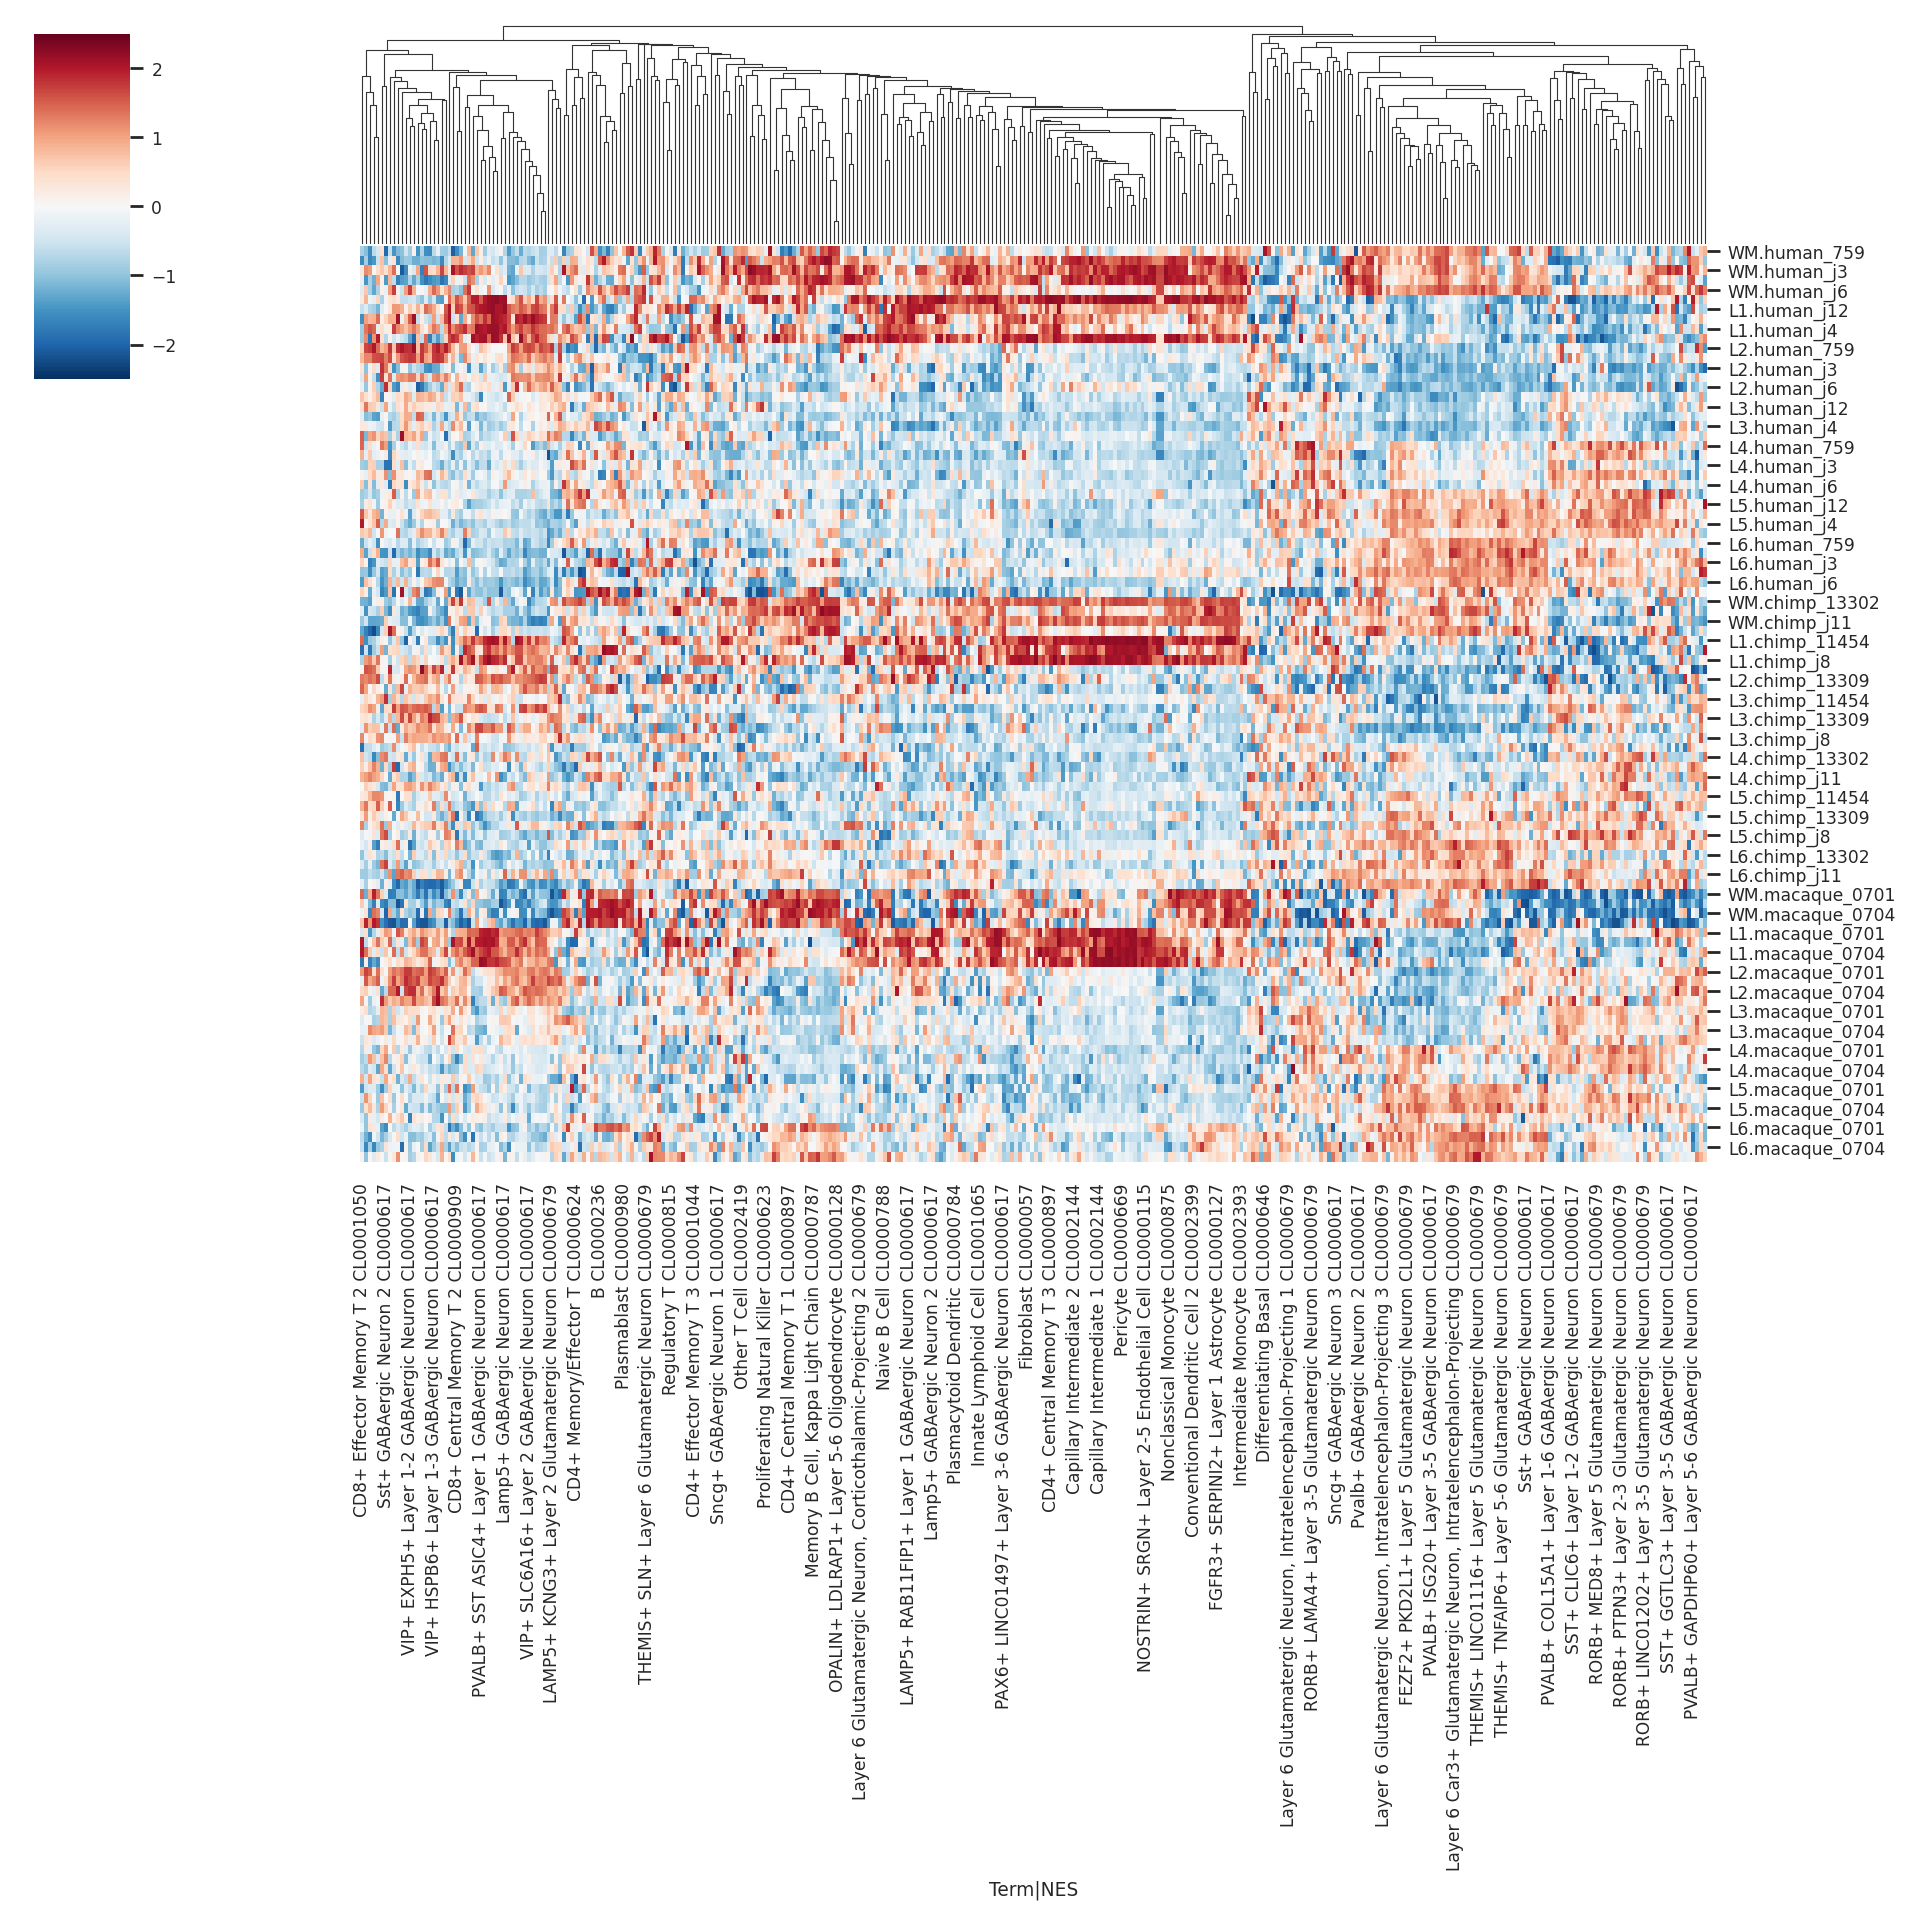

In [24]:
sns.set(font_scale=0.7)
sc.pl.clustermap(adata_en, cmap="RdBu_r", vmin=-2.5, vmax=2.5, figsize=(12, 12), annot_kws={"size": 2}, row_cluster=False, save='_all_cell_types.png')

## Спектральная кластеризация

### 6 кластеров

In [25]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels

n_clusters = 6
aff_matrix = pairwise_kernels(df.T, metric='cosine') + 1
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed')
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=6)

In [26]:
labels = pd.Series(clustering.labels_, index=df.columns).map({0: 'A', 1: 'D', 2: 'E', 3: 'C', 4: 'B', 5: 'F'})
adata_en.var[f'spectral_{n_clusters}'] = labels
order = labels.sort_values().index

<ipython-input-26-d56a125ec6a2>:2: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


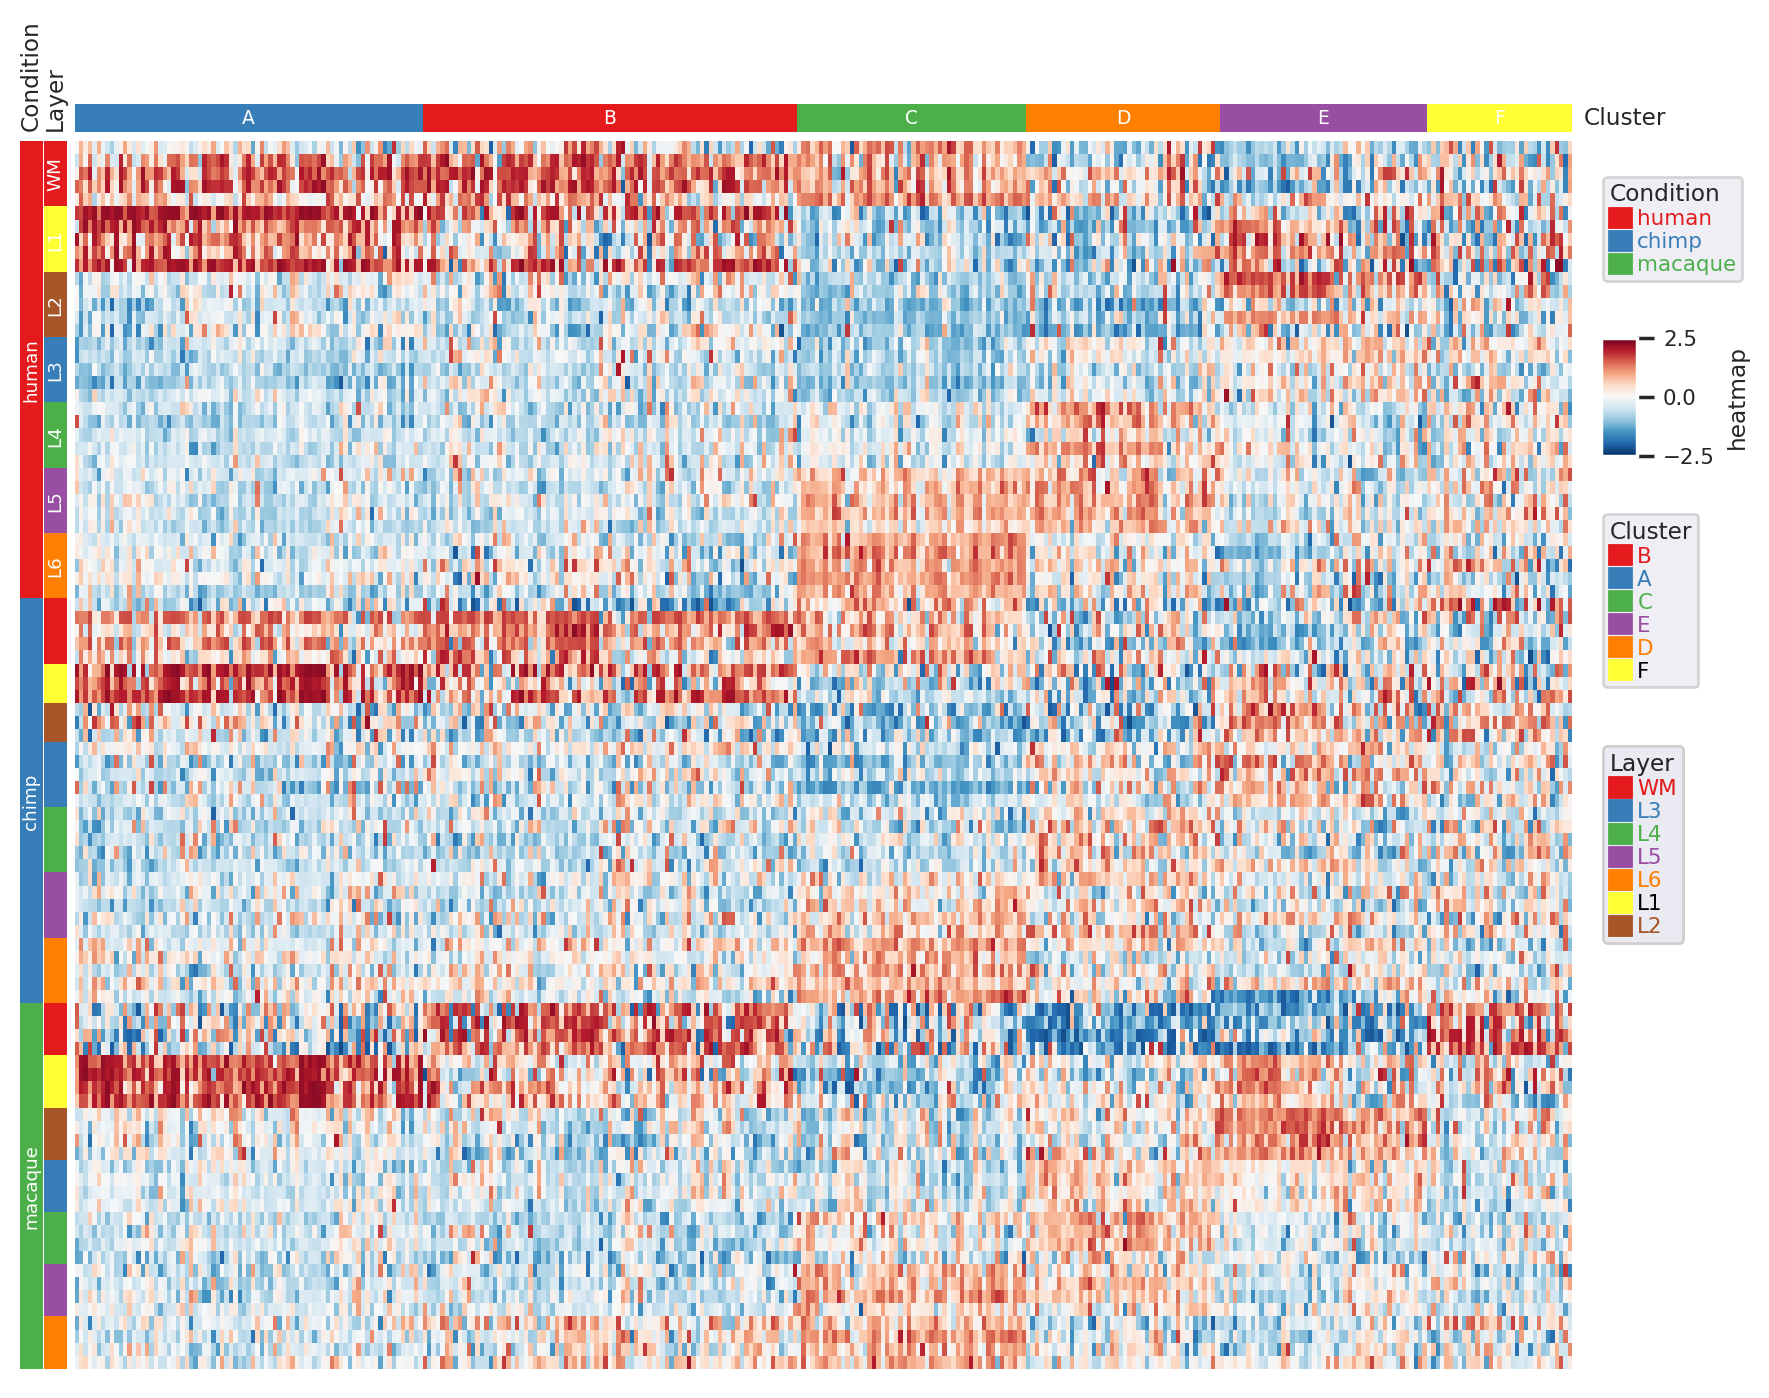

In [27]:
import PyComplexHeatmap as hm
from matplotlib.colors import LinearSegmentedColormap

col_ha = hm.HeatmapAnnotation(Cluster=hm.anno_simple(labels.sort_values().astype(str), legend=True, add_text=True), axis=1)

row_ha = hm.HeatmapAnnotation(Condition=hm.anno_simple(adata_en.obs.condition.astype(str), legend=True, add_text=True),
                              Layer=hm.anno_simple(adata_en.obs.layer.astype(str), legend=True, add_text=True), axis=0)

plt.figure(figsize=(10, 7))
cm = hm.ClusterMapPlotter(data=df.loc[sample_order['all'], order], top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False, row_names_side='left',
                       cmap='RdBu_r', row_cluster=False, col_cluster=False,
                       rasterized=True, legend=True, legend_anchor='ax_heatmap', vmax=2.5, vmin=-2.5)
#legend_pad control the space between heatmap and legend.
plt.savefig("heatmap_spectr6_ann.png", bbox_inches='tight')
#plt.savefig("sample_data/heatmaps/heatmap_spectr_hs_ann.pdf", bbox_inches='tight')
plt.show()

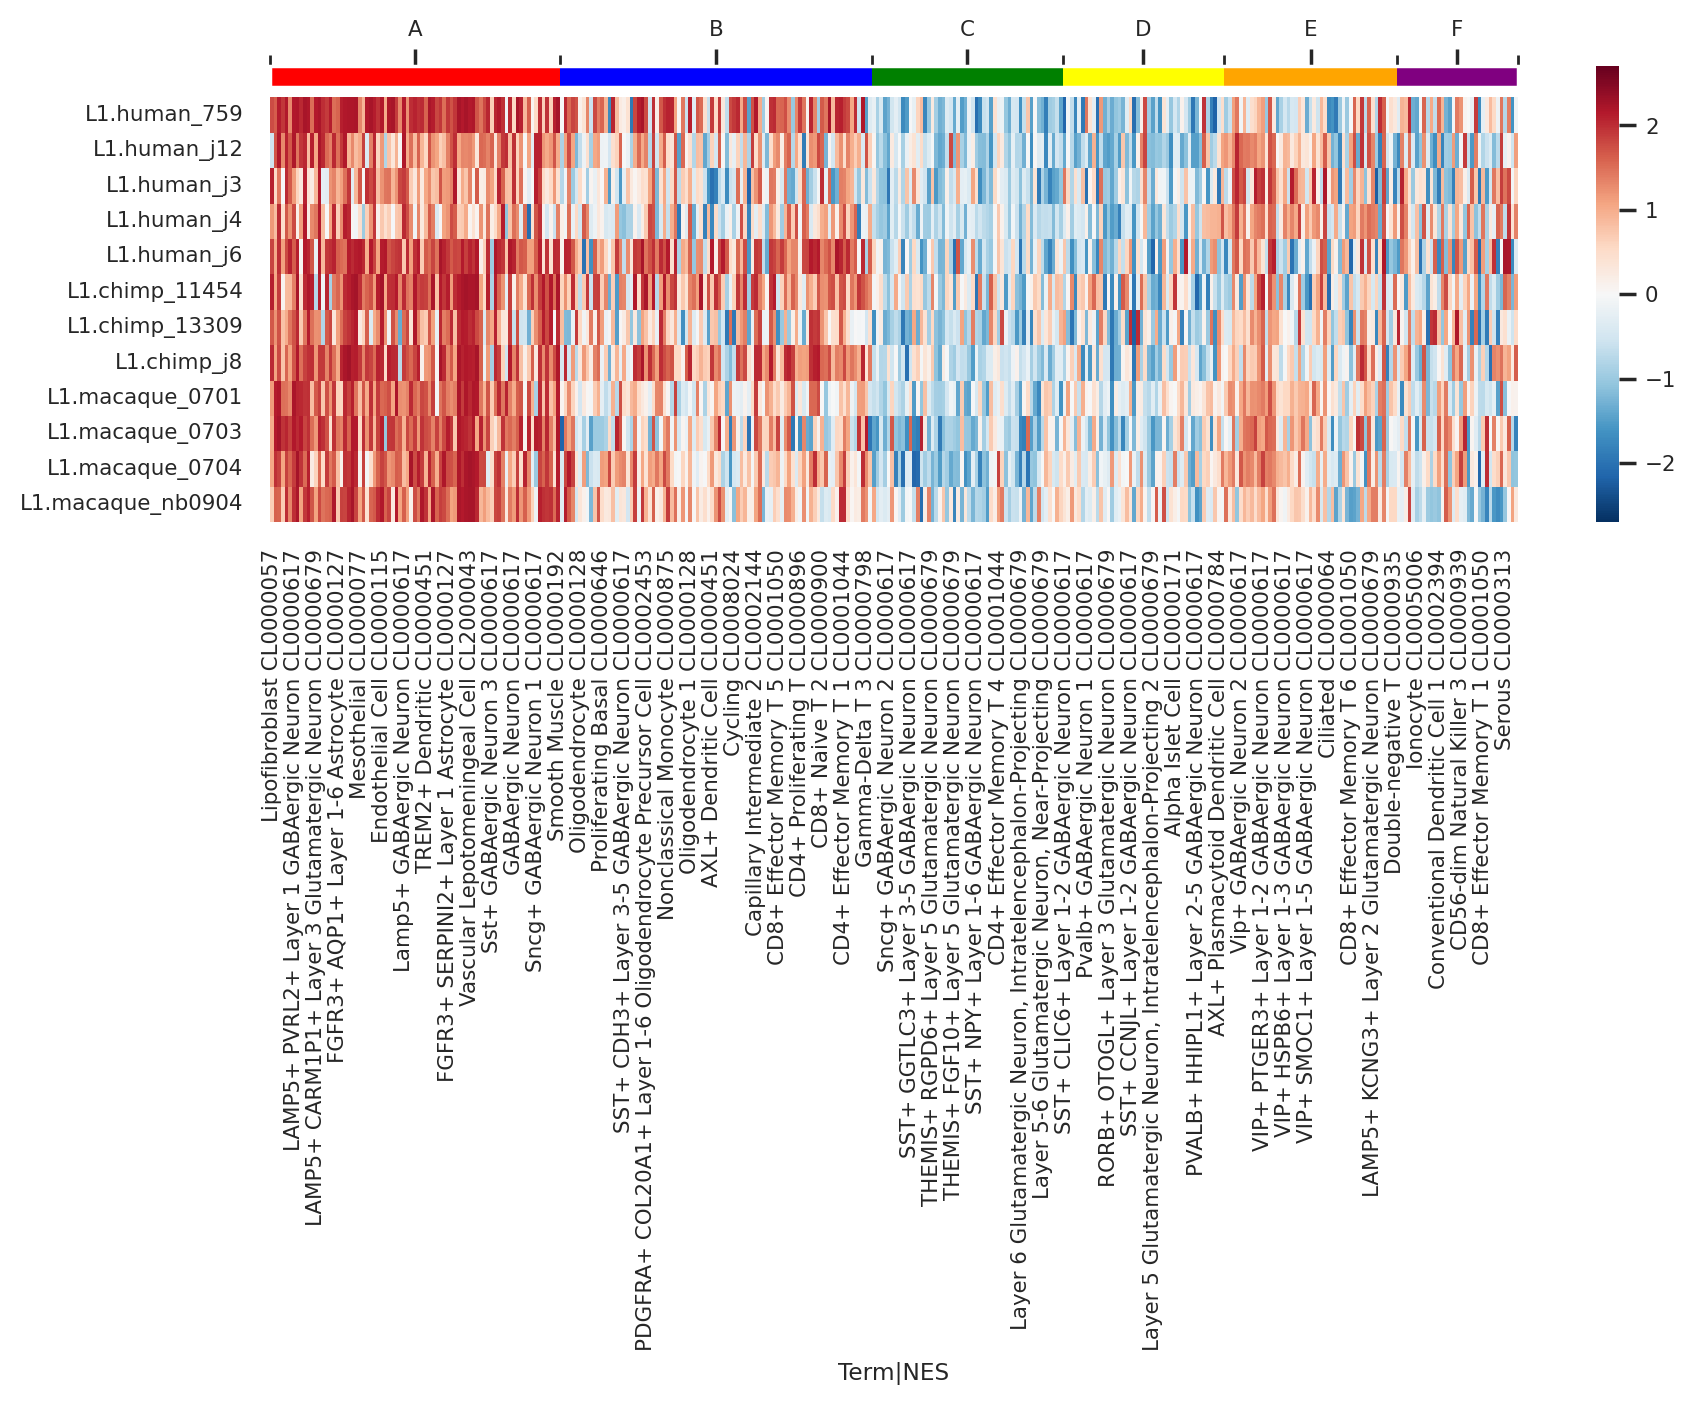

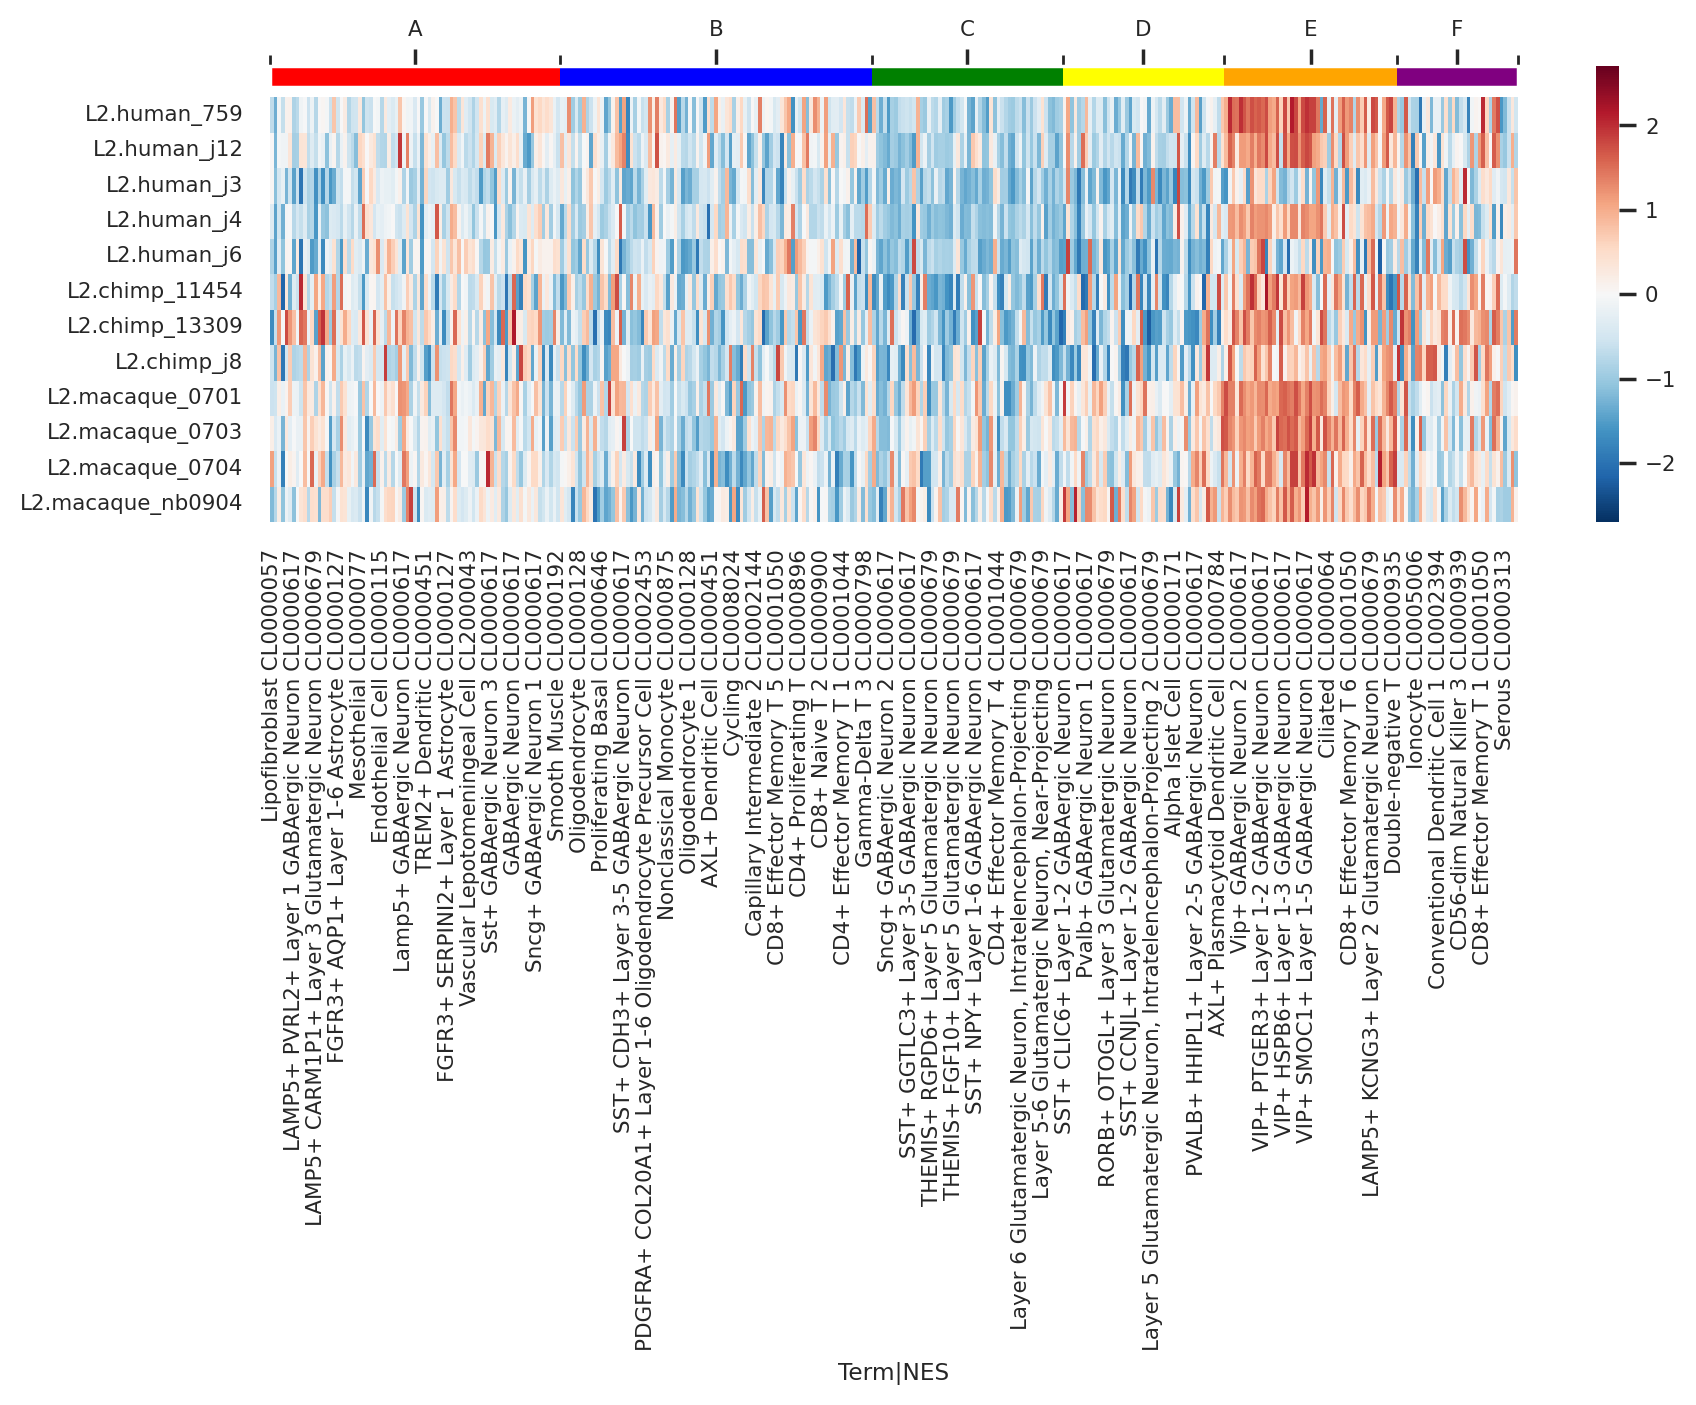

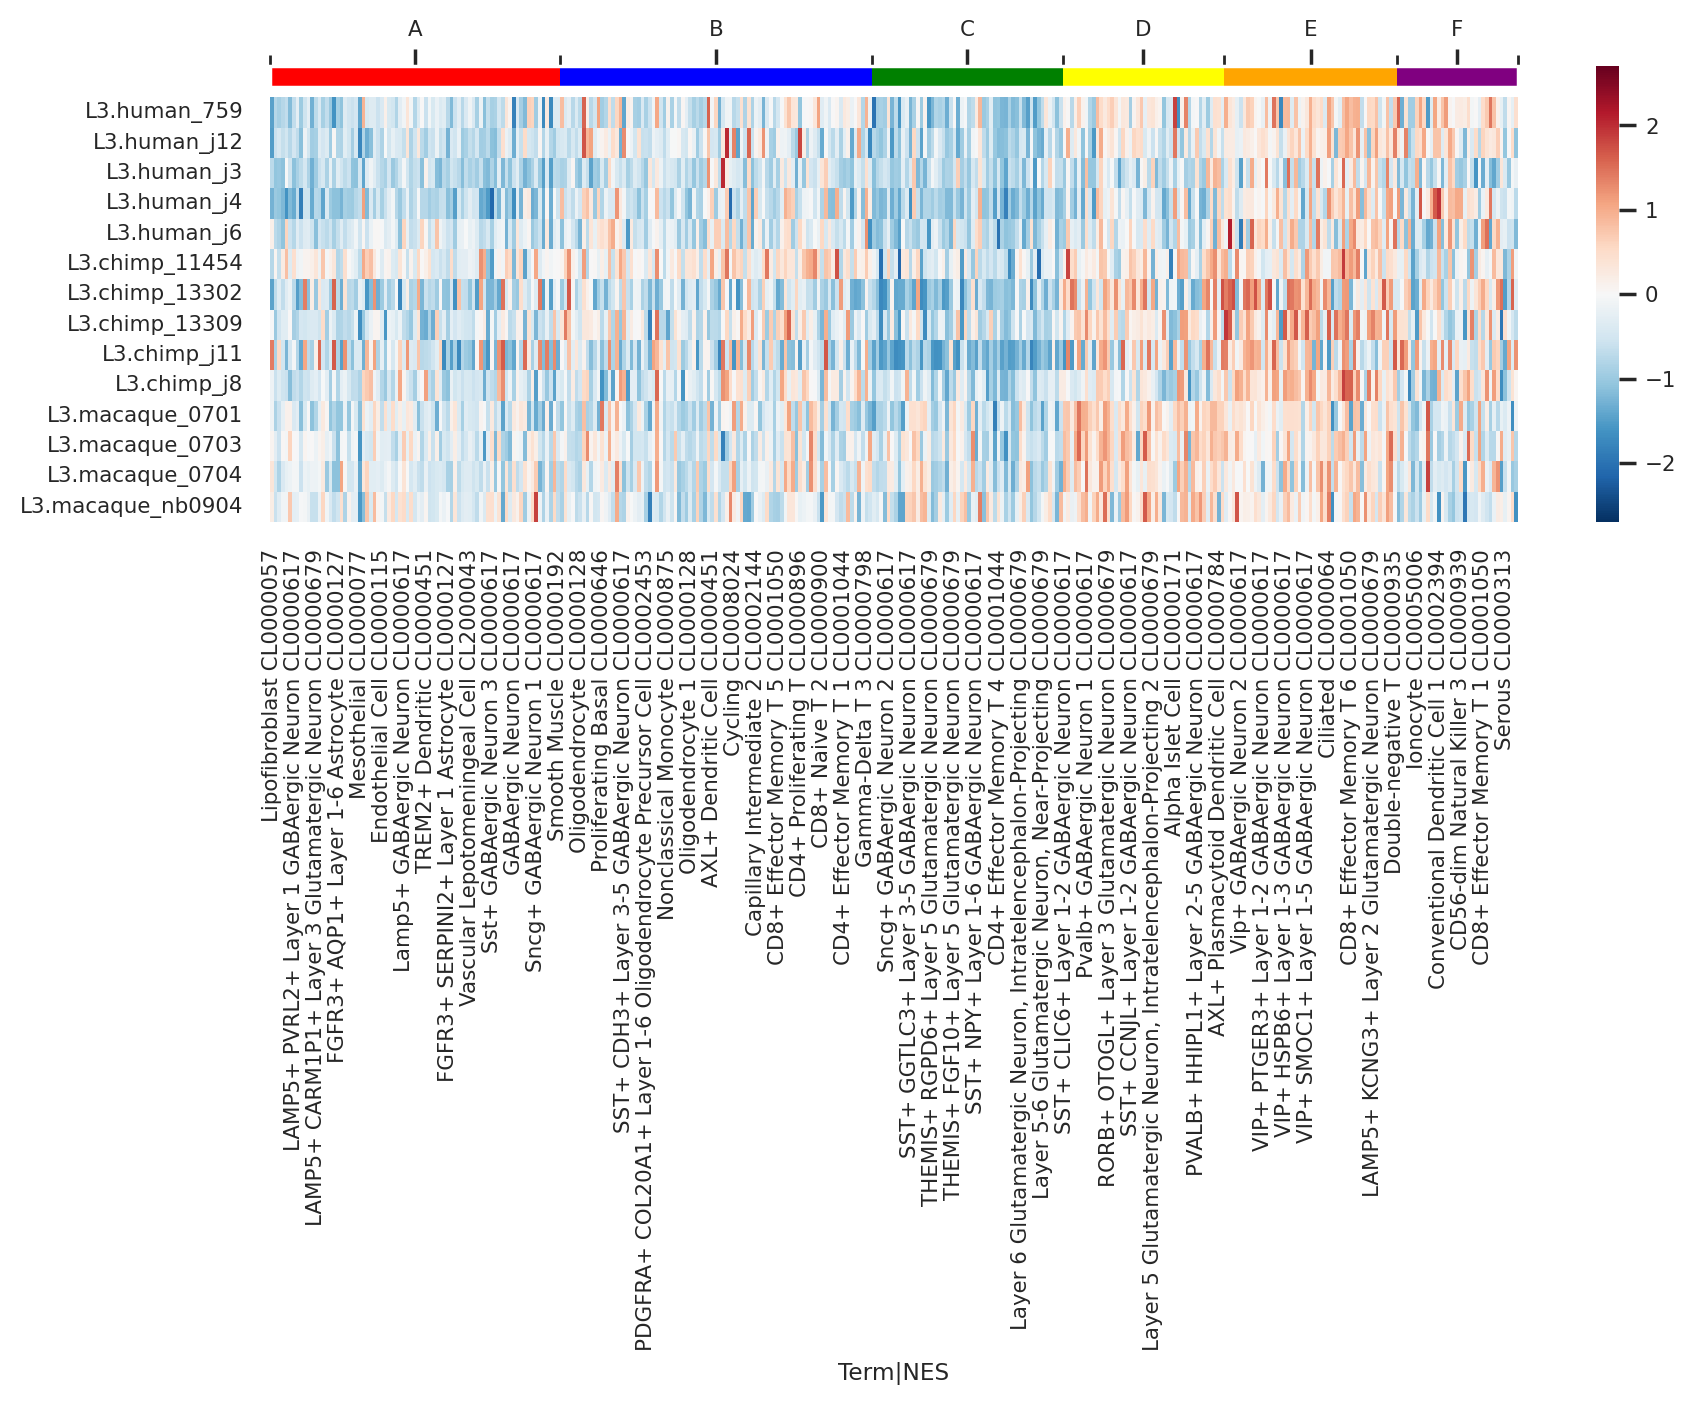

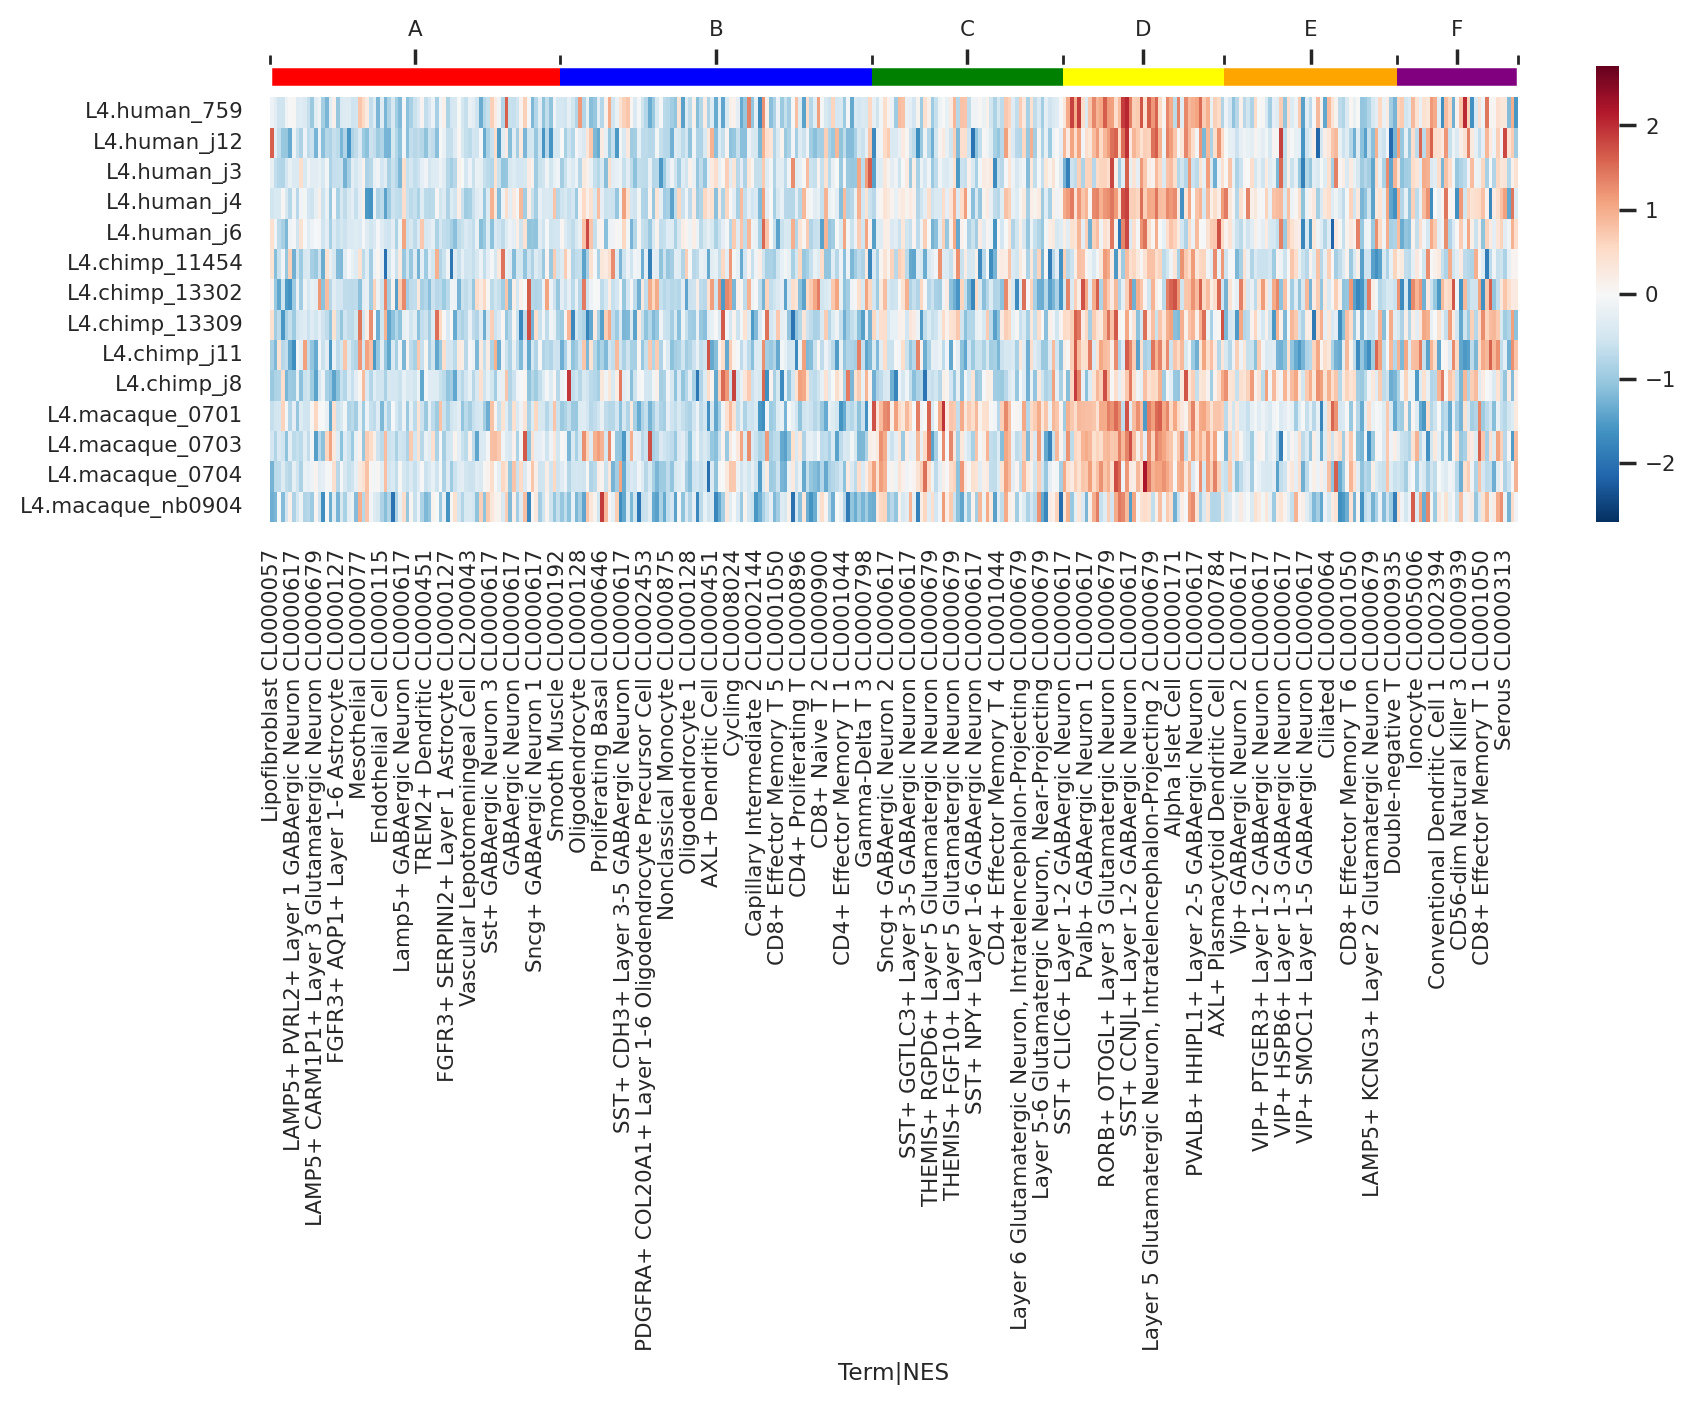

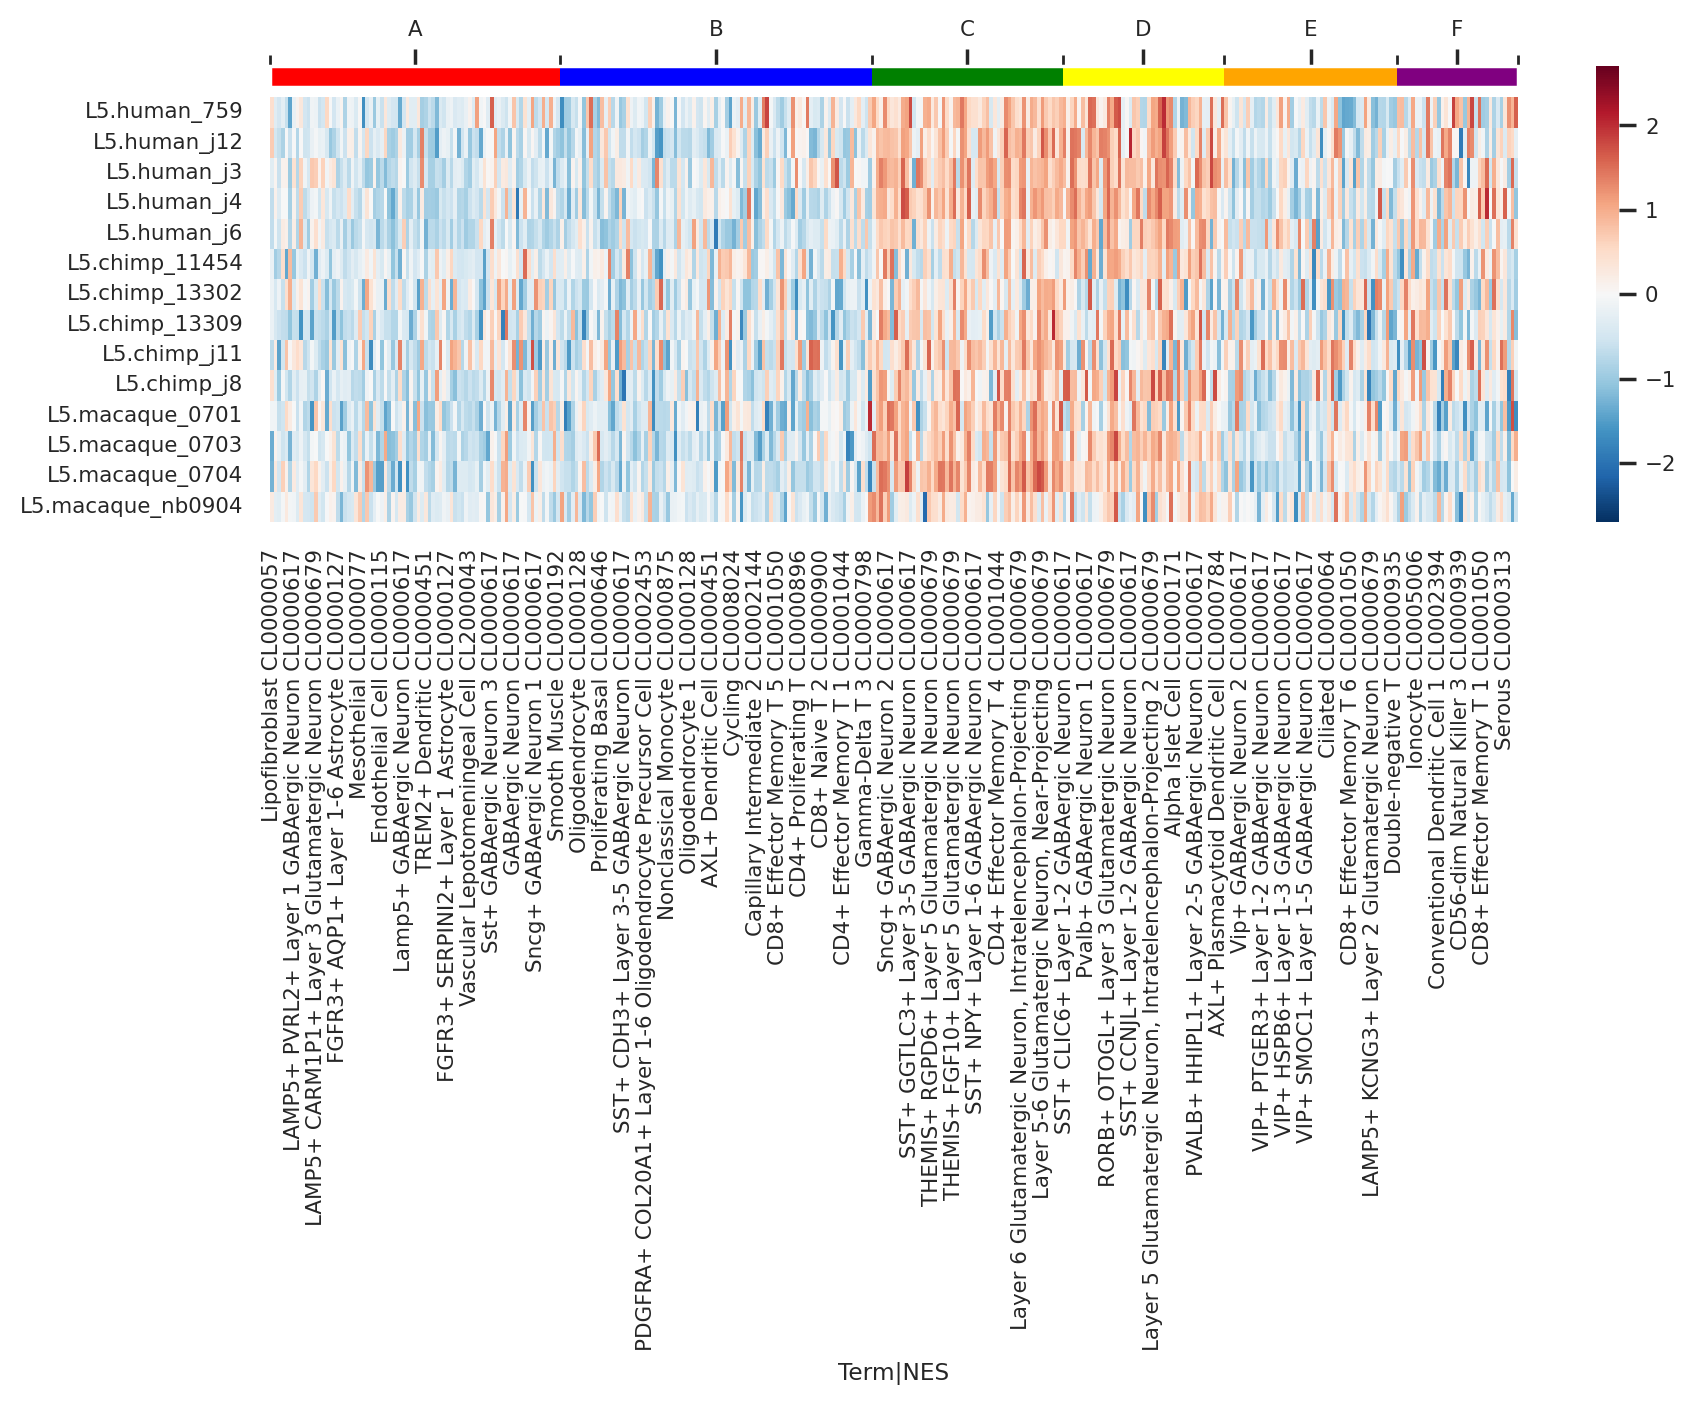

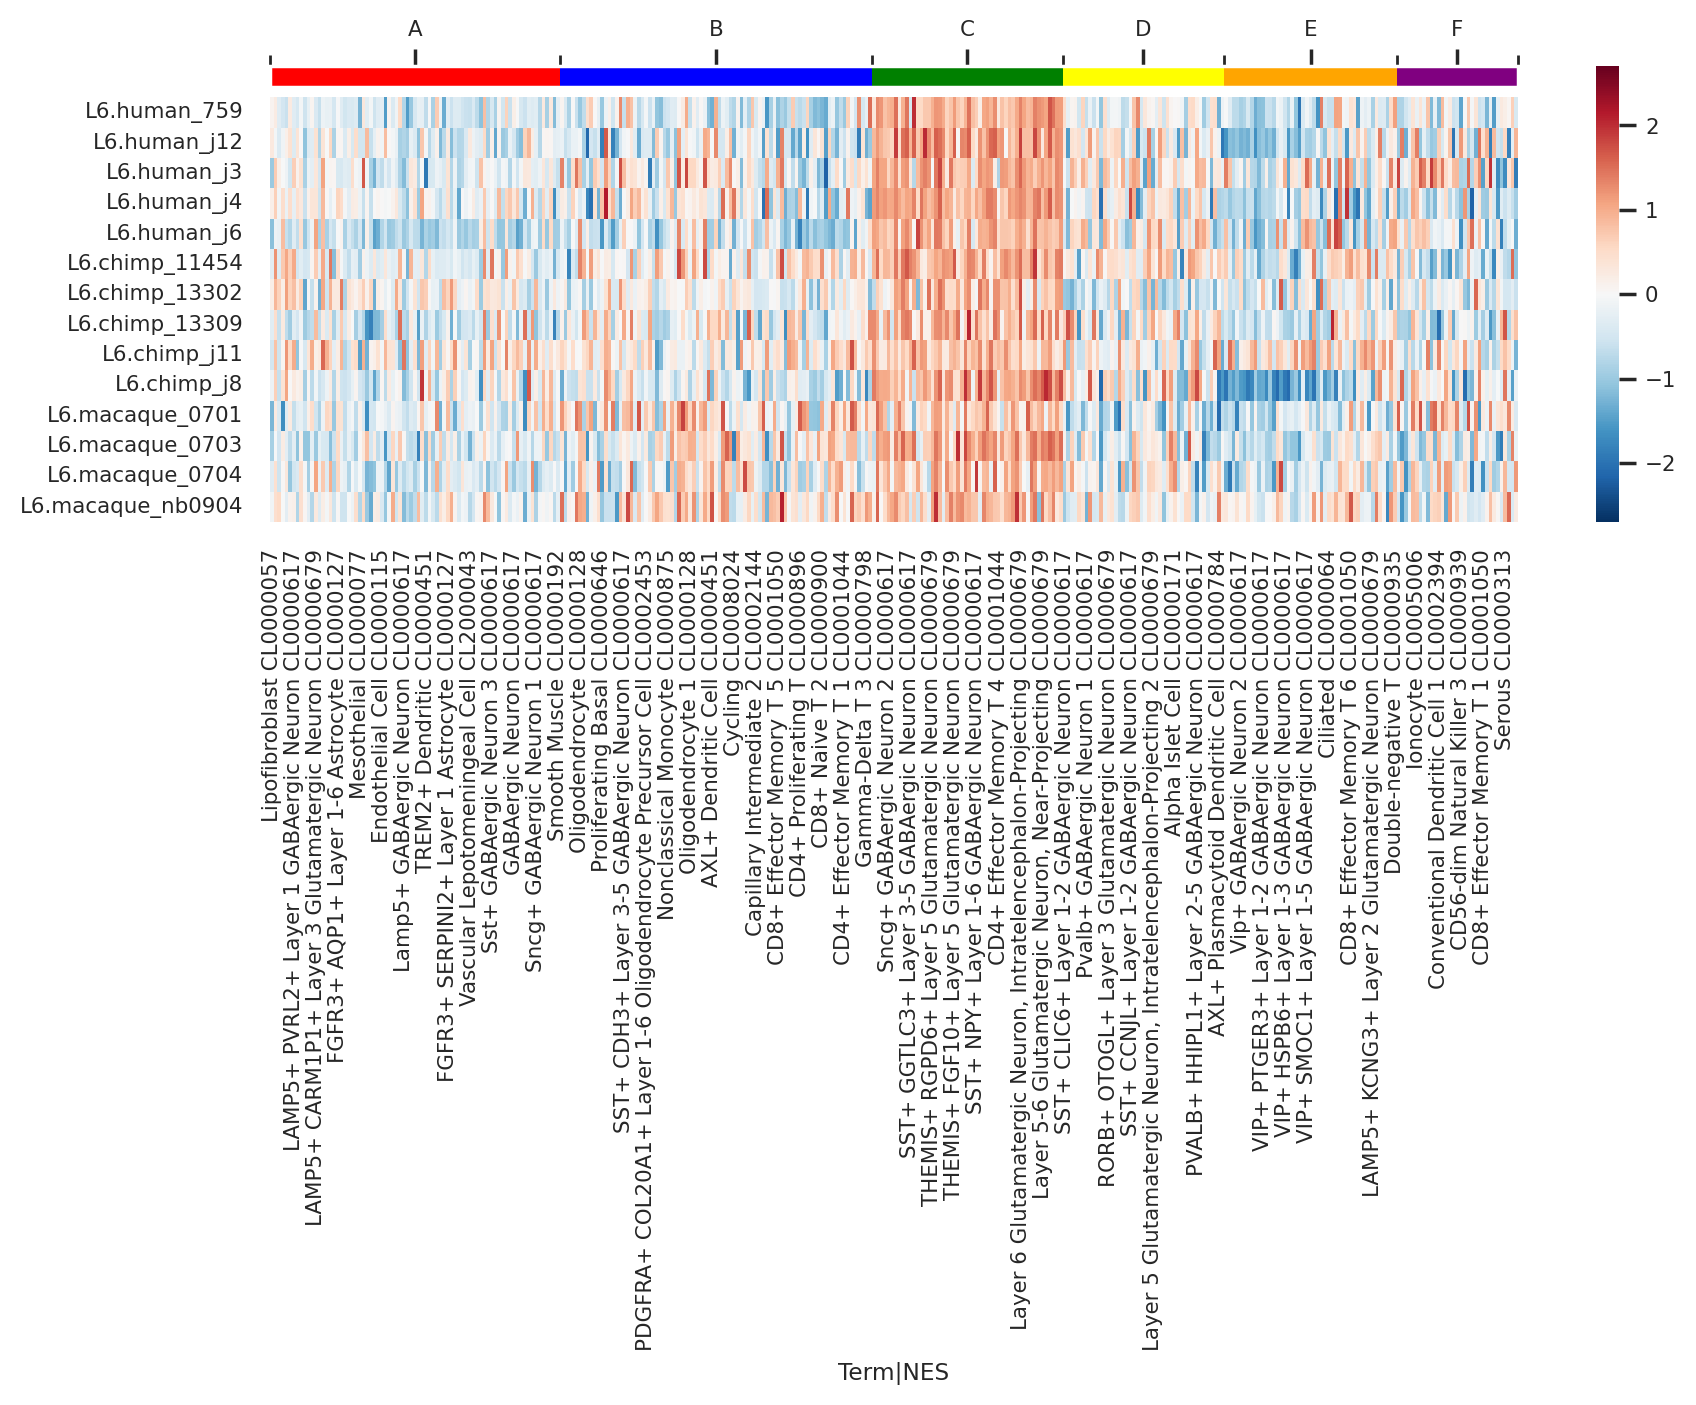

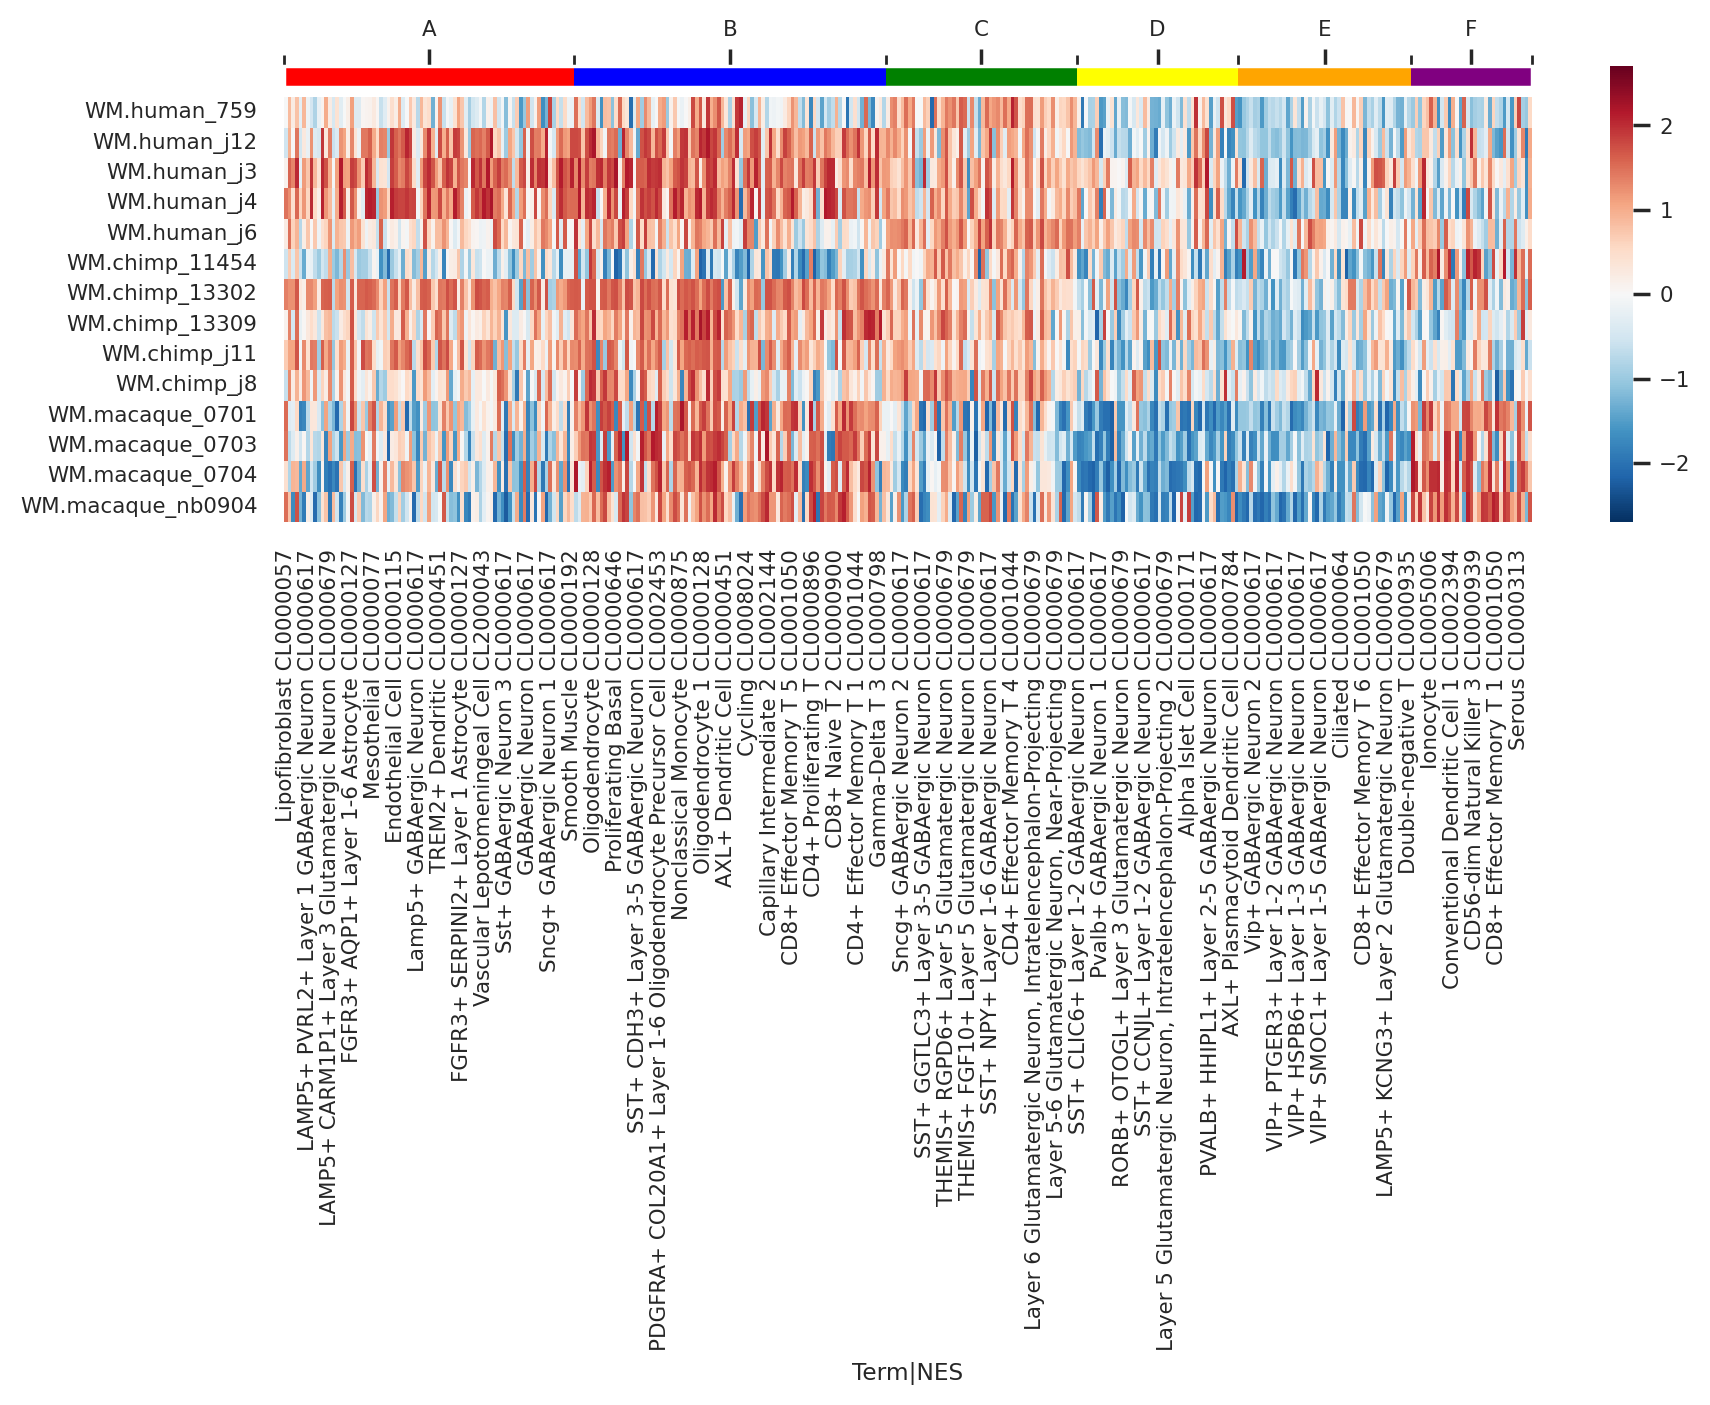

In [28]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

clusters = ['A', 'B', 'C', 'D', 'E', 'F']

for layer in ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'WM']:
    fig, ax = plt.subplots(figsize=(10, 3), gridspec_kw={'hspace': 0})
    df_layer = df.loc[df.index.str.contains(layer)]
    sns.heatmap(df_layer.loc[:, order], ax=ax, cmap="RdBu_r", vmax=2.7, vmin=-2.7, center=0)
    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('top', size='5%', pad=0.05)
    cmap = mpl.colors.ListedColormap(['red', 'blue', 'green',  'yellow', 'orange', 'purple'])

    cluster_size = labels.value_counts().loc[clusters].values
    cluster_pos = cluster_size.cumsum()
    bounds = [0] + list(cluster_pos)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
        cax=cax,
        ticks=bounds,
        orientation='horizontal',
        spacing='proportional'
    )
    cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
    cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
    cax.xaxis.tick_top() 
    #plt.savefig(f'sample_data/heatmaps/heatmap_norm_hs_{layer}.png', bbox_inches='tight')

Отрисуем только значимые из ановы гены

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


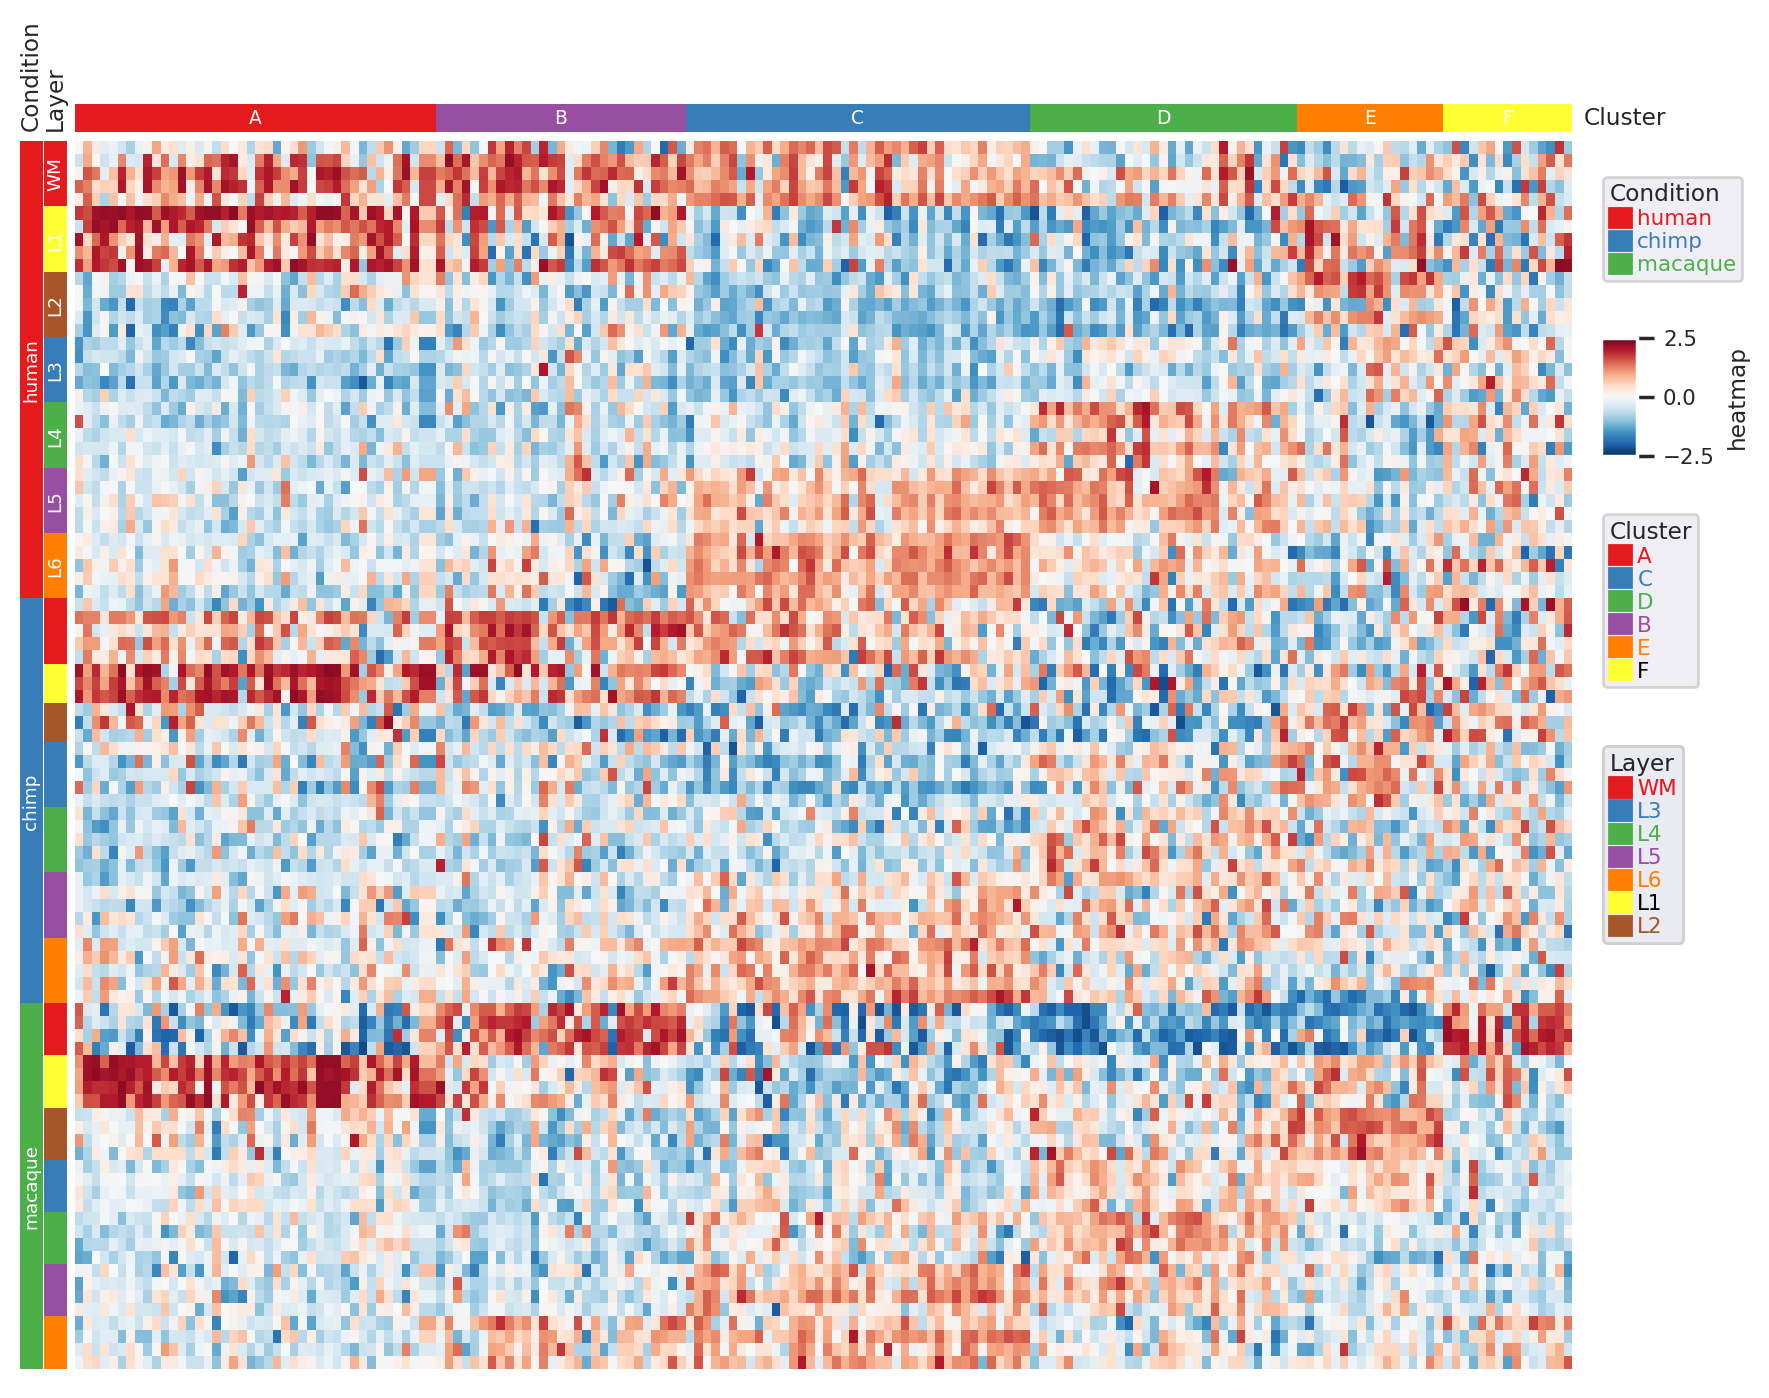

In [29]:
import PyComplexHeatmap as hm
from matplotlib.colors import LinearSegmentedColormap

col_ha = hm.HeatmapAnnotation(Cluster=hm.anno_simple(labels.loc[order & anova_cell_types].sort_values().astype(str), legend=True, add_text=True), axis=1)

row_ha = hm.HeatmapAnnotation(Condition=hm.anno_simple(adata_en.obs.condition.astype(str), legend=True, add_text=True),
                              Layer=hm.anno_simple(adata_en.obs.layer.astype(str), legend=True, add_text=True), axis=0)

plt.figure(figsize=(10, 7))
cm = hm.ClusterMapPlotter(data=df.loc[sample_order['all'], order & anova_cell_types], top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False, row_names_side='left',
                       cmap='RdBu_r', row_cluster=False, col_cluster=False,
                       rasterized=True, legend=True, legend_anchor='ax_heatmap', vmax=2.5, vmin=-2.5)
#legend_pad control the space between heatmap and legend.
plt.savefig("heatmap_spectr6_anova.png", bbox_inches='tight')
#plt.savefig("sample_data/heatmaps/heatmap_spectr_hs_ann.pdf", bbox_inches='tight')
plt.show()

<Axes: xlabel='spectral_6', ylabel='count'>

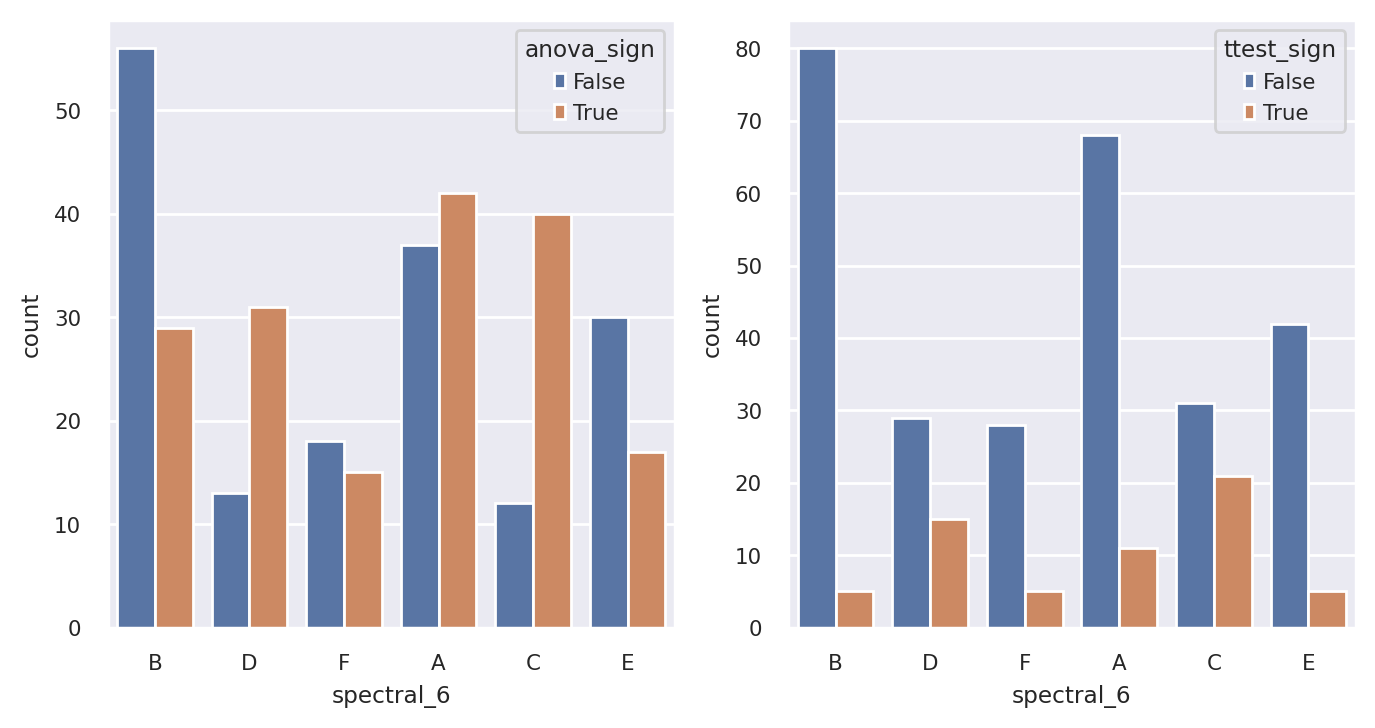

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=adata_en.var, x="spectral_6", hue='anova_sign', ax=ax[0])
sns.countplot(data=adata_en.var, x="spectral_6", hue='ttest_sign', ax=ax[1])

### 8 кластеров

In [31]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels

n_clusters = 8
aff_matrix = pairwise_kernels(df.T, metric='cosine') + 1
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed')
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1)

In [32]:
labels = pd.Series(clustering.labels_, index=df.columns)
# labels = pd.Series(clustering.labels_, index=df.columns).map({0: 'A', 1: 'D', 2: 'E', 3: 'C', 4: 'B', 5: 'F'})
adata_en.var[f'spectral_{n_clusters}'] = labels
order = labels.sort_values().index

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


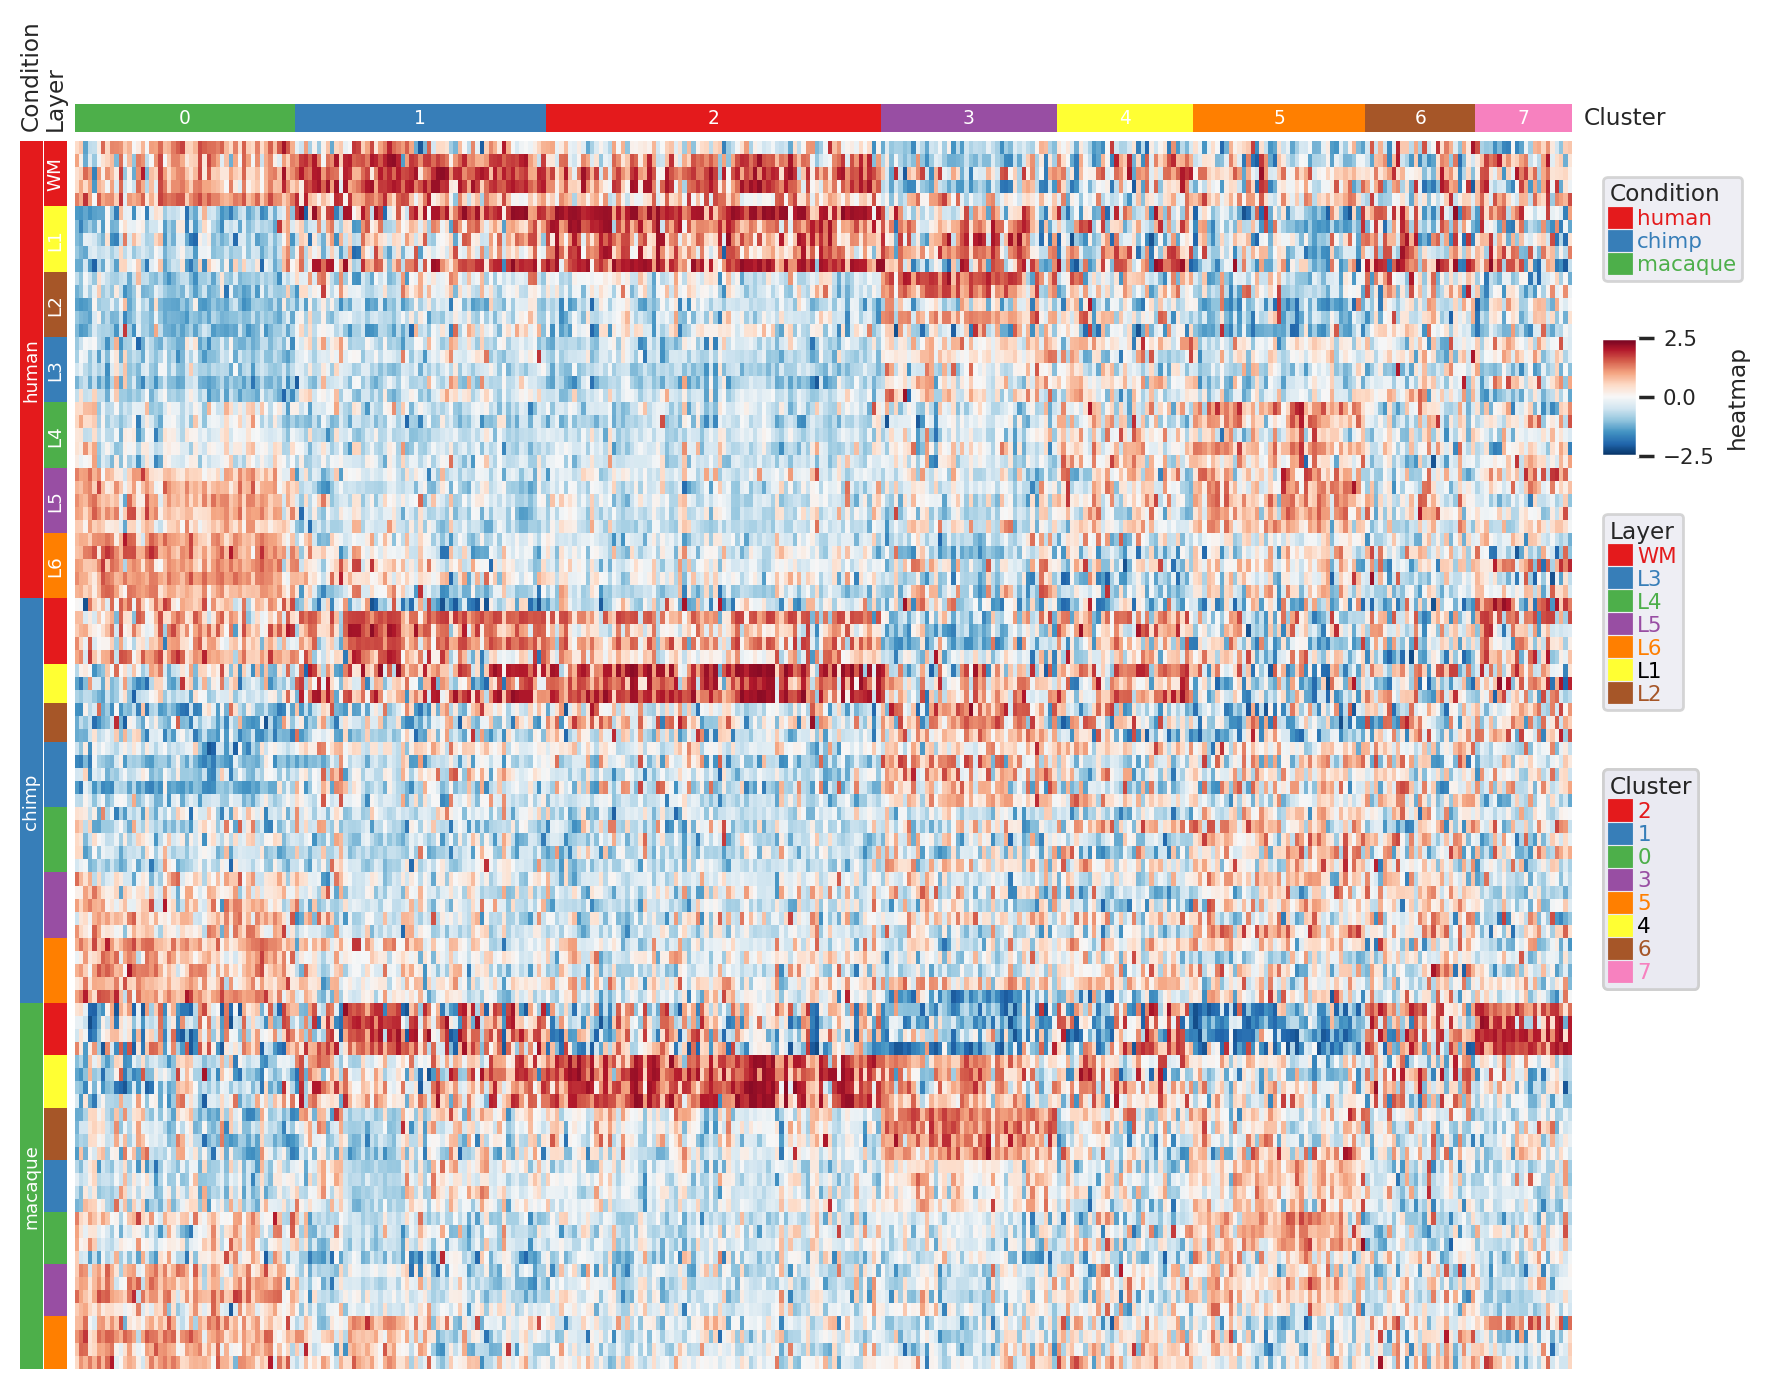

In [33]:
import PyComplexHeatmap as hm
from matplotlib.colors import LinearSegmentedColormap

col_ha = hm.HeatmapAnnotation(Cluster=hm.anno_simple(labels.sort_values().astype(str), legend=True, add_text=True), axis=1)

row_ha = hm.HeatmapAnnotation(Condition=hm.anno_simple(adata_en.obs.condition.astype(str), legend=True, add_text=True),
                              Layer=hm.anno_simple(adata_en.obs.layer.astype(str), legend=True, add_text=True), axis=0)

plt.figure(figsize=(10, 7))
cm = hm.ClusterMapPlotter(data=df.loc[sample_order['all'], order], top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False, row_names_side='left',
                       cmap='RdBu_r', row_cluster=False, col_cluster=False,
                       rasterized=True, legend=True, legend_anchor='ax_heatmap', vmax=2.5, vmin=-2.5)
#legend_pad control the space between heatmap and legend.
plt.savefig(f"heatmap_spectr{n_clusters}_ann.png", bbox_inches='tight')
#plt.savefig("sample_data/heatmaps/heatmap_spectr_hs_ann.pdf", bbox_inches='tight')
plt.show()

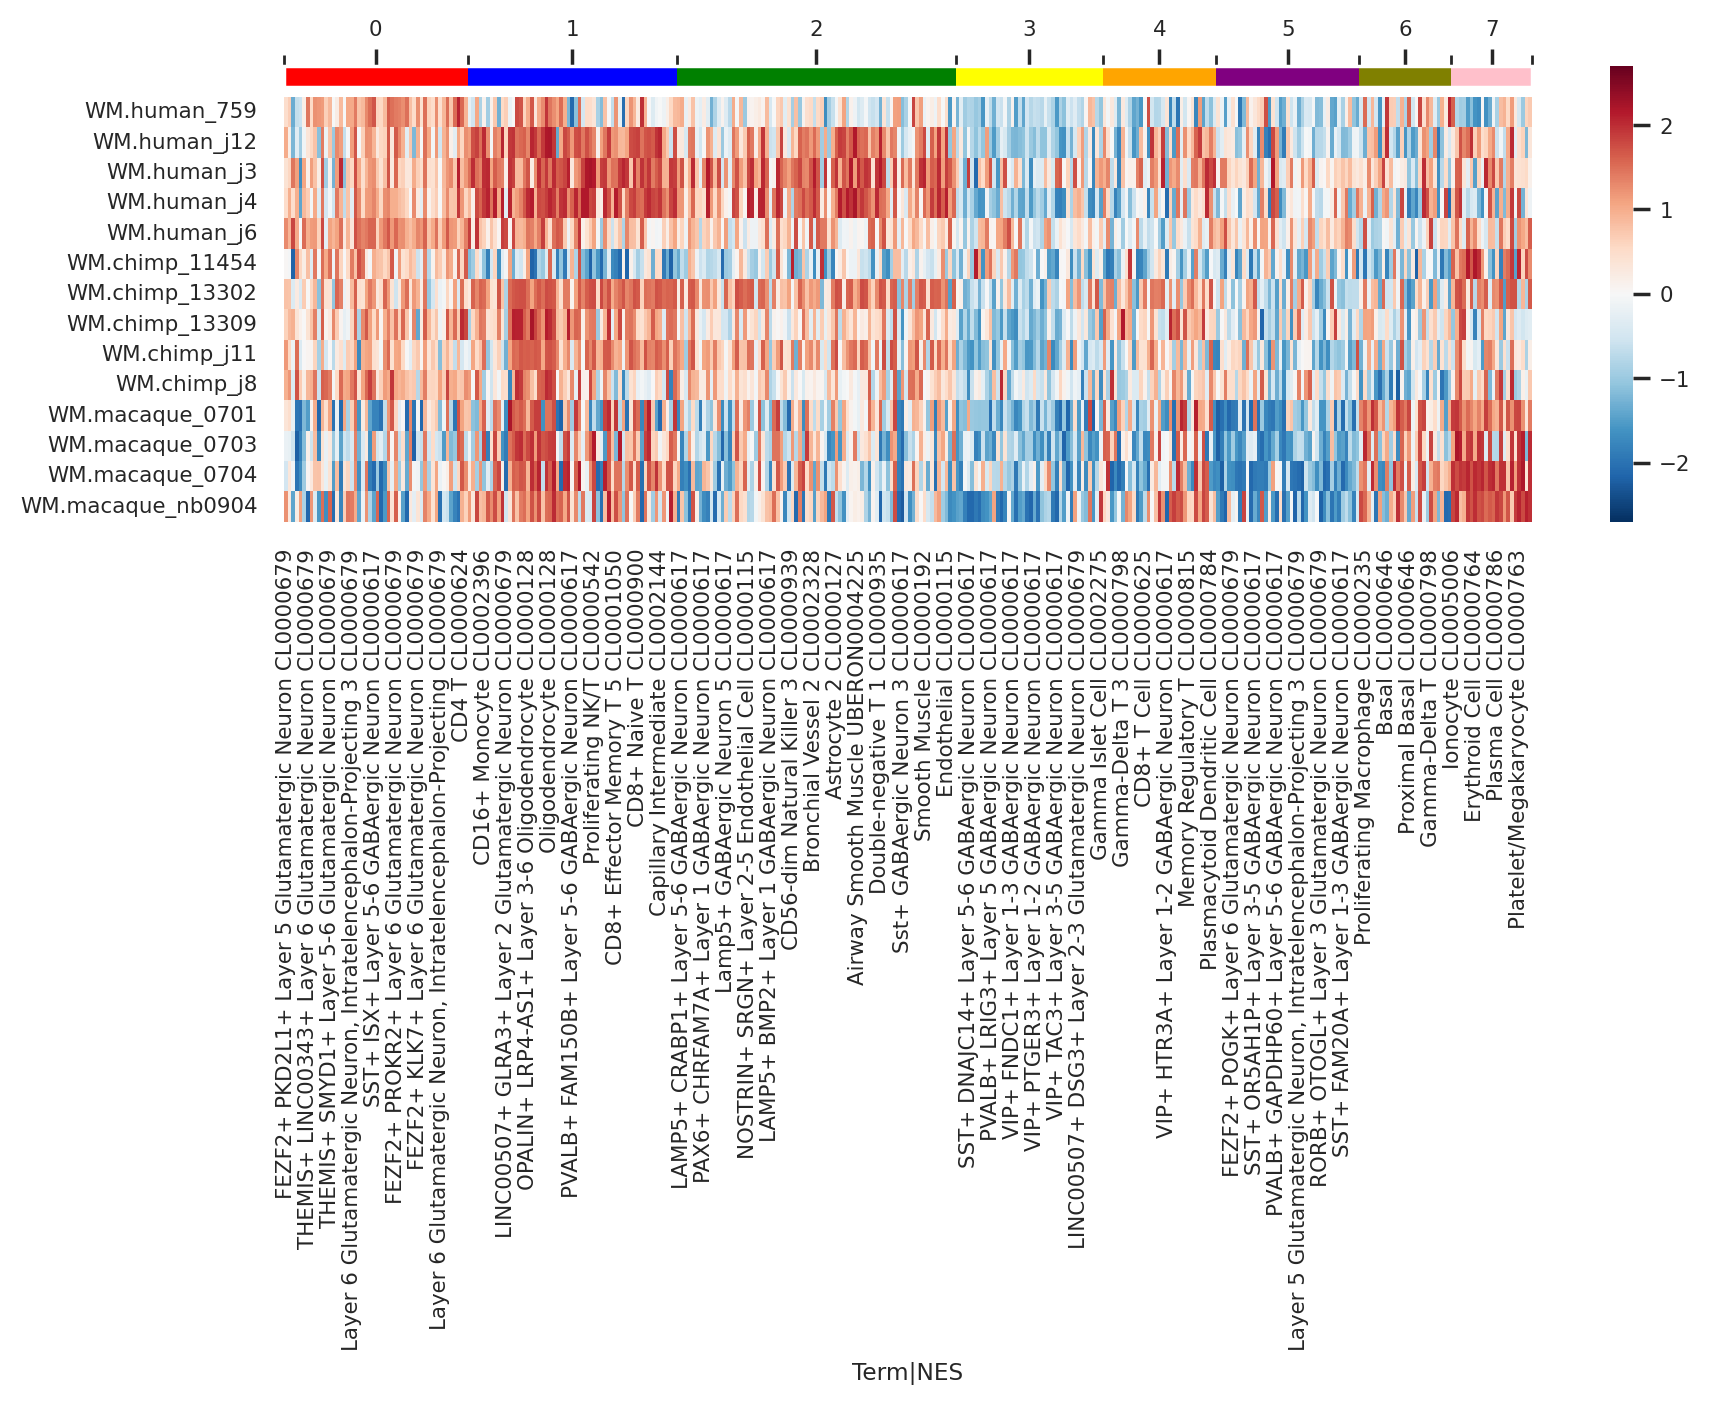

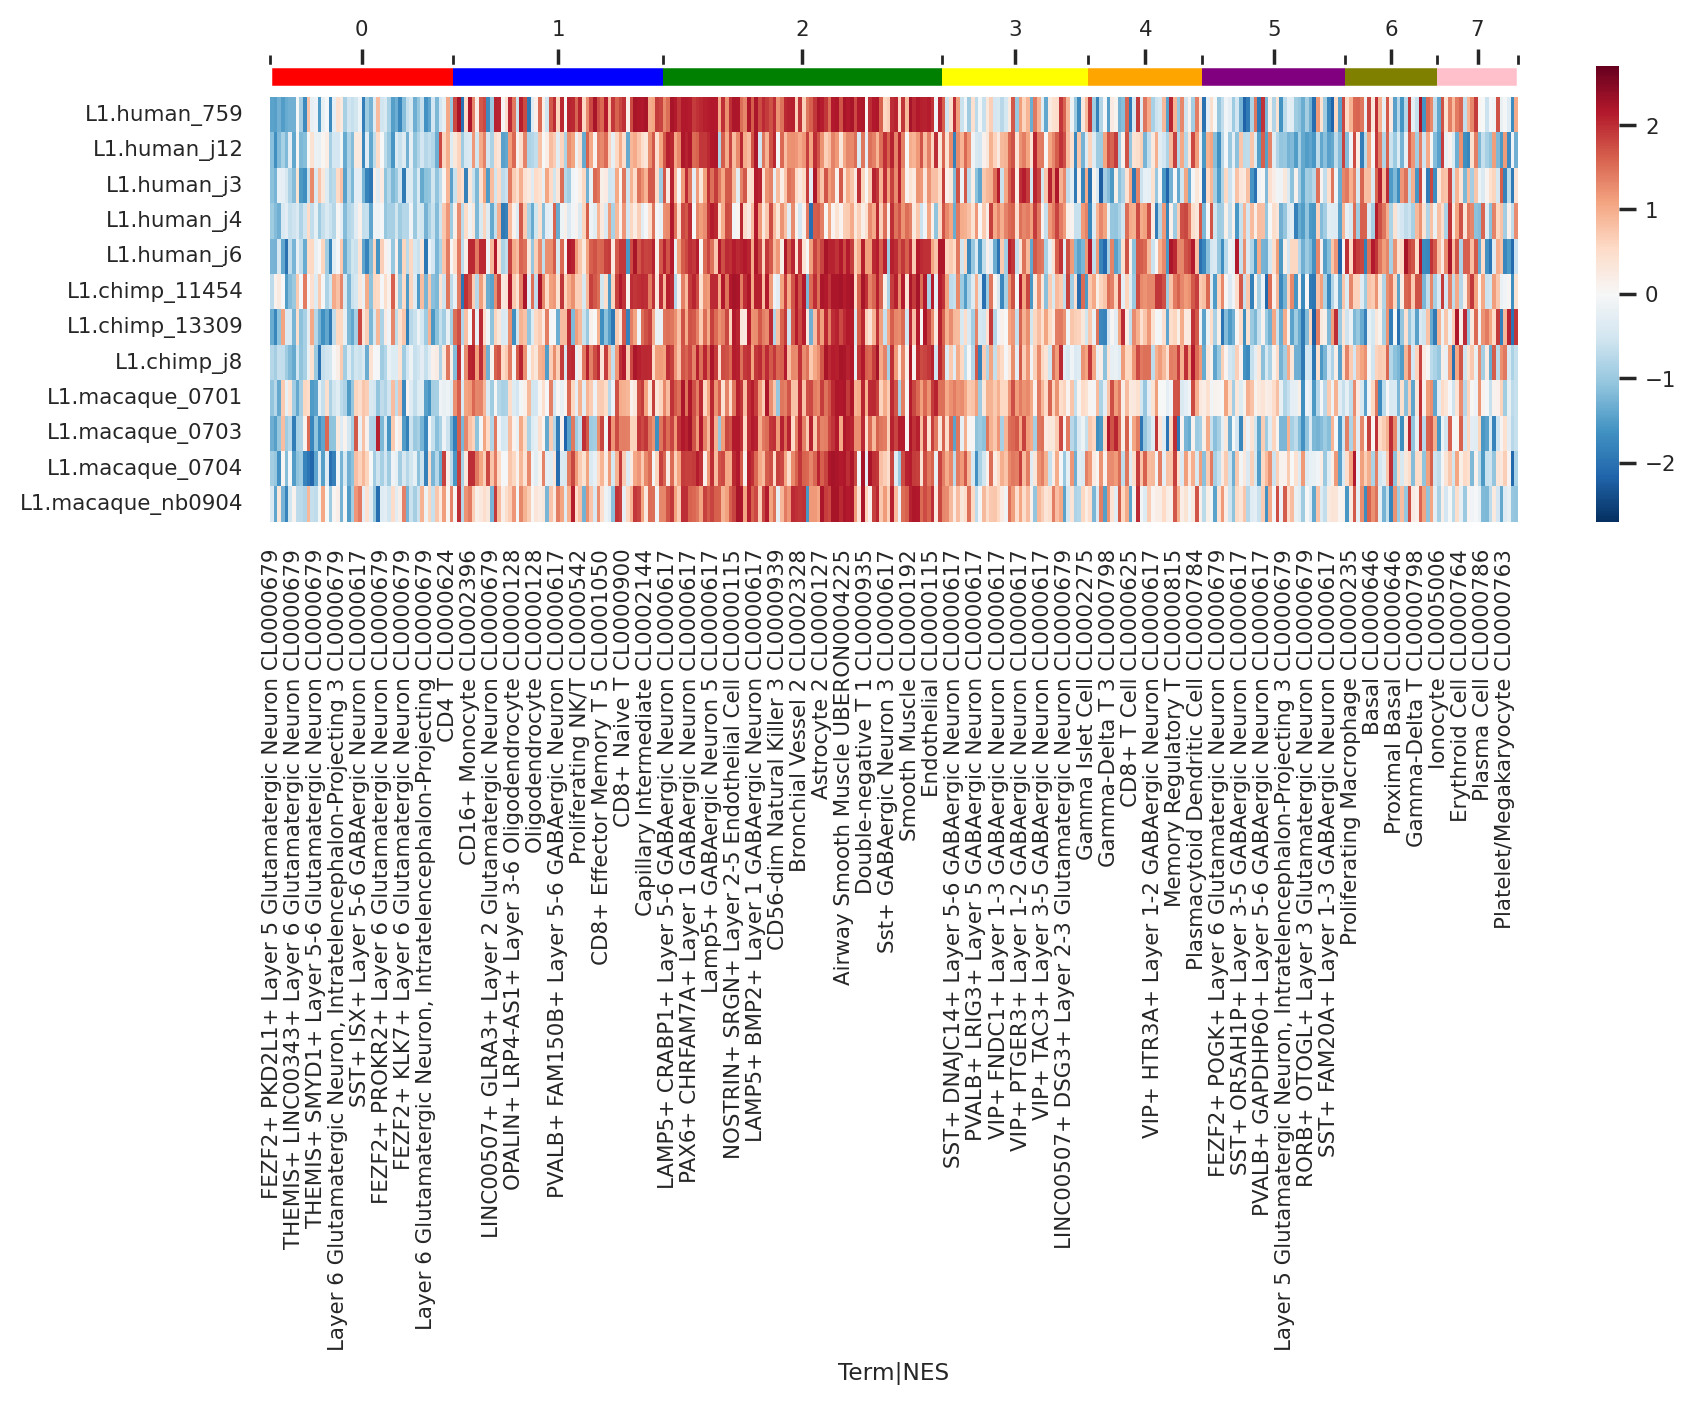

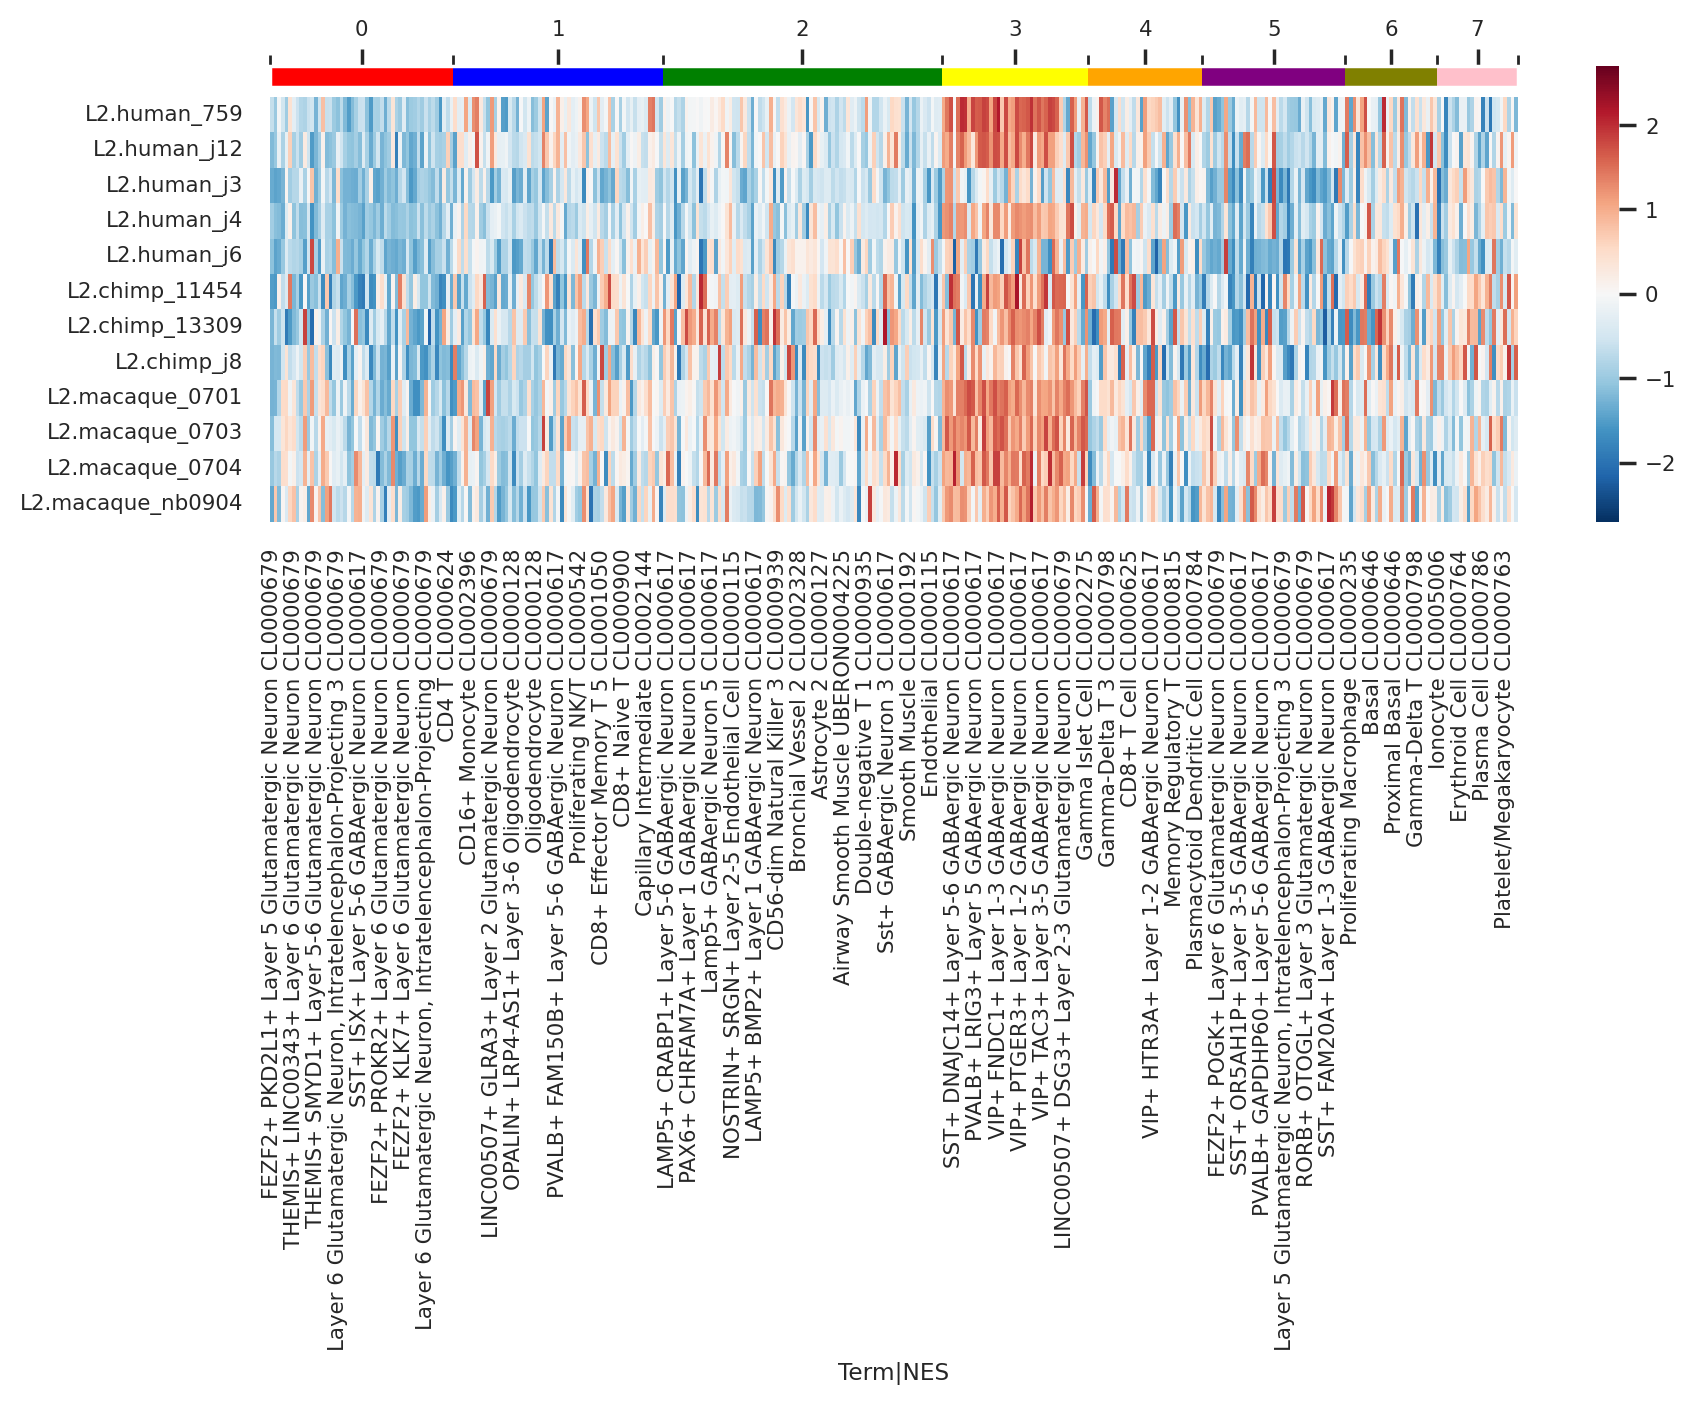

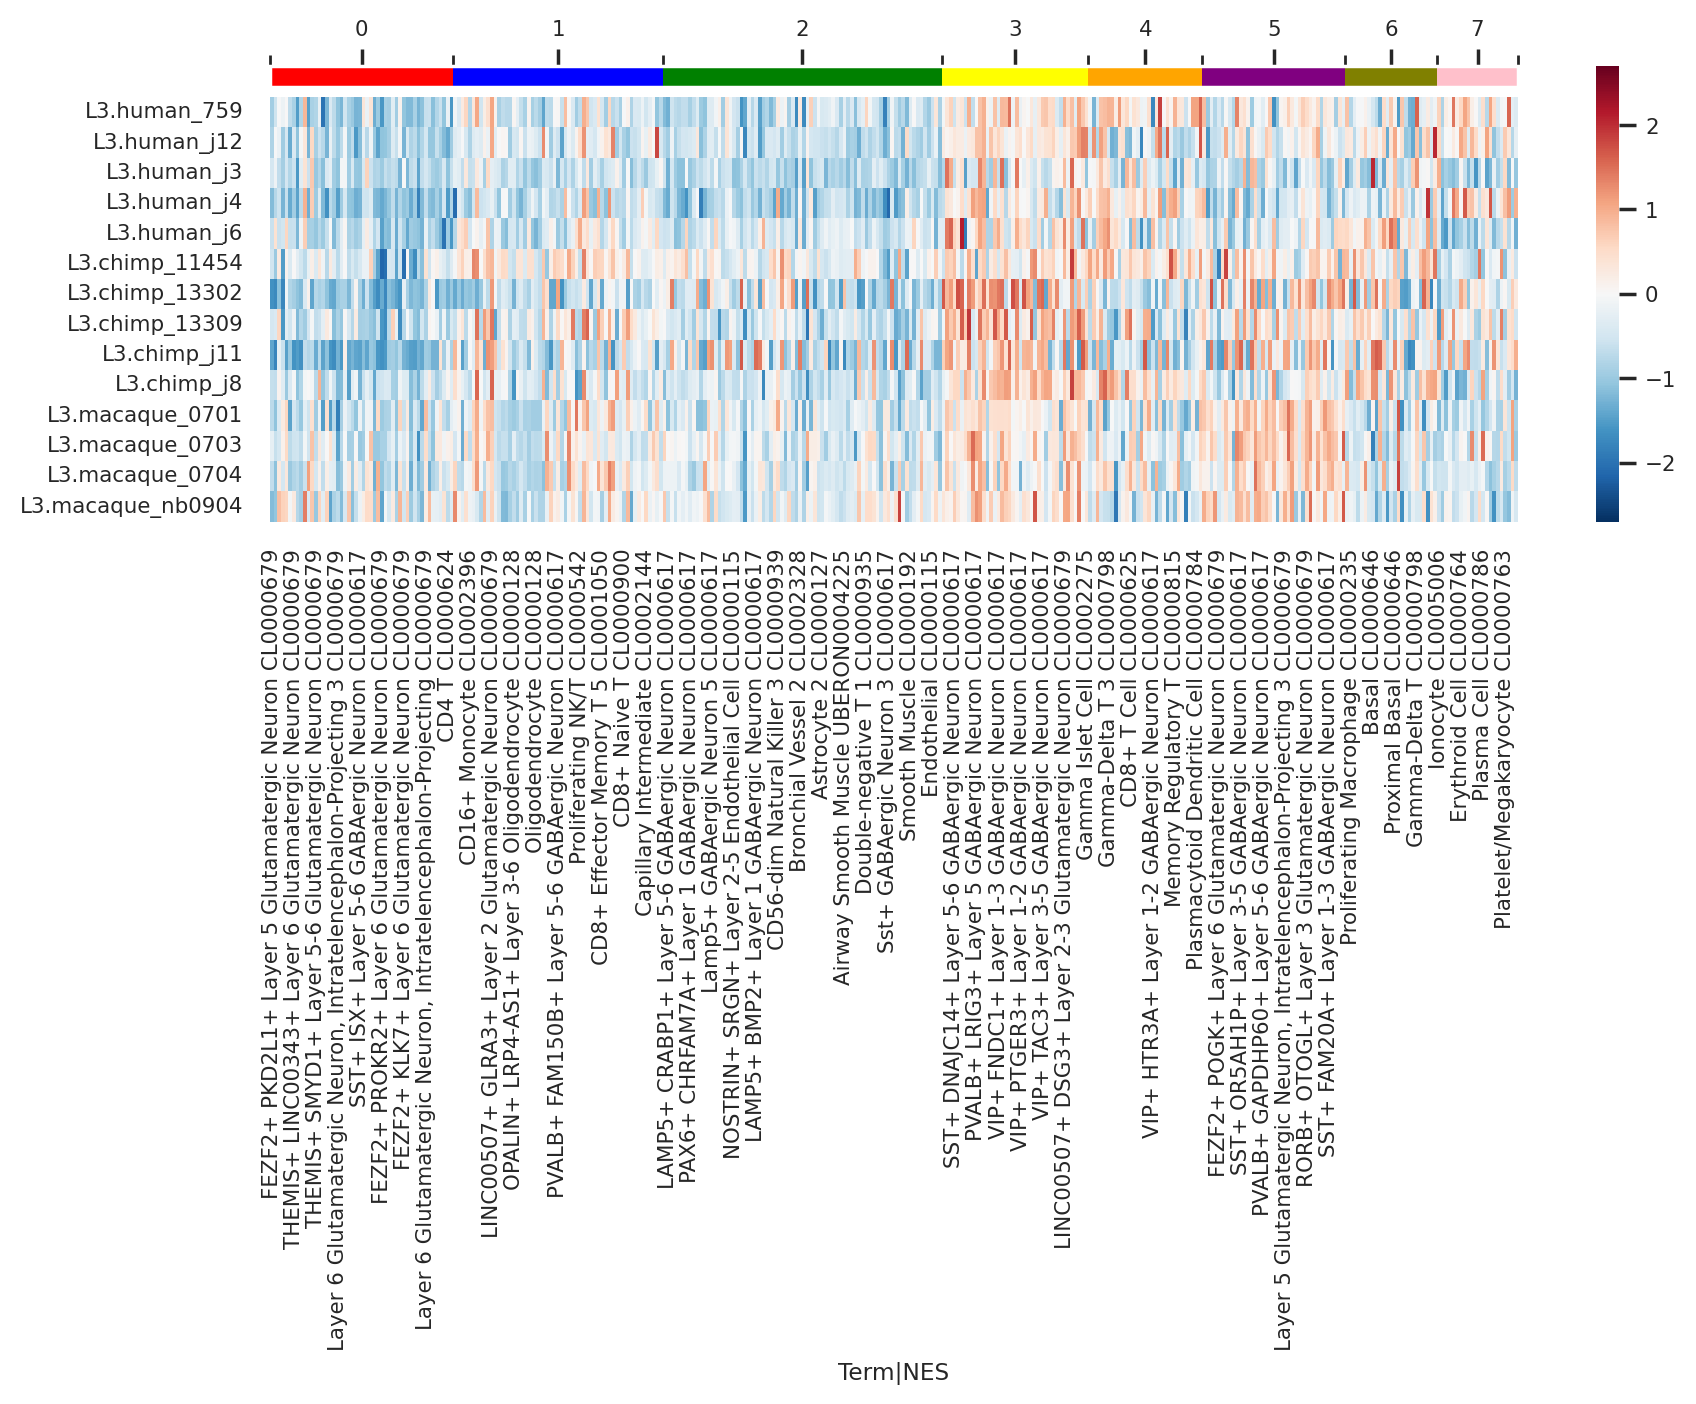

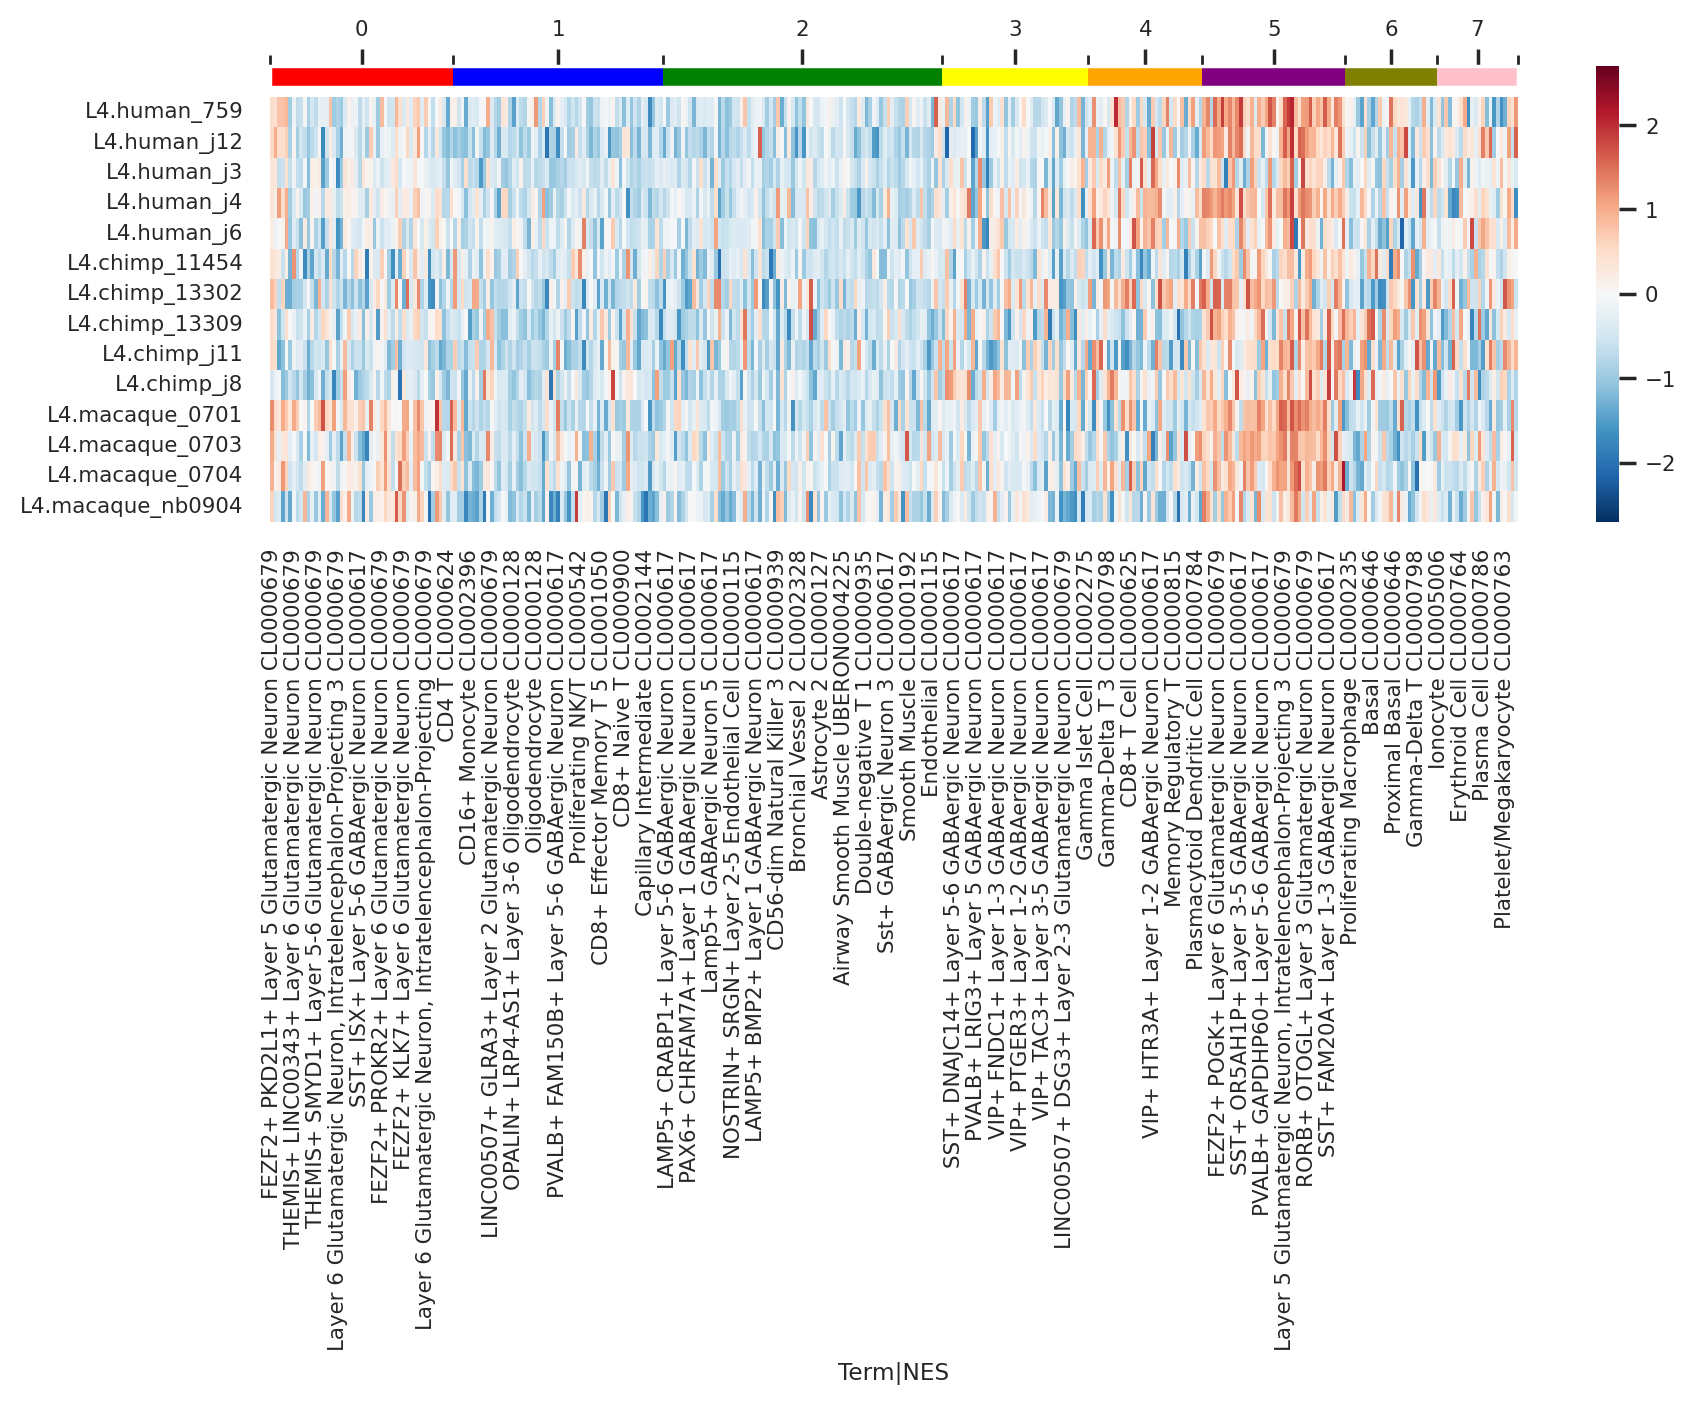

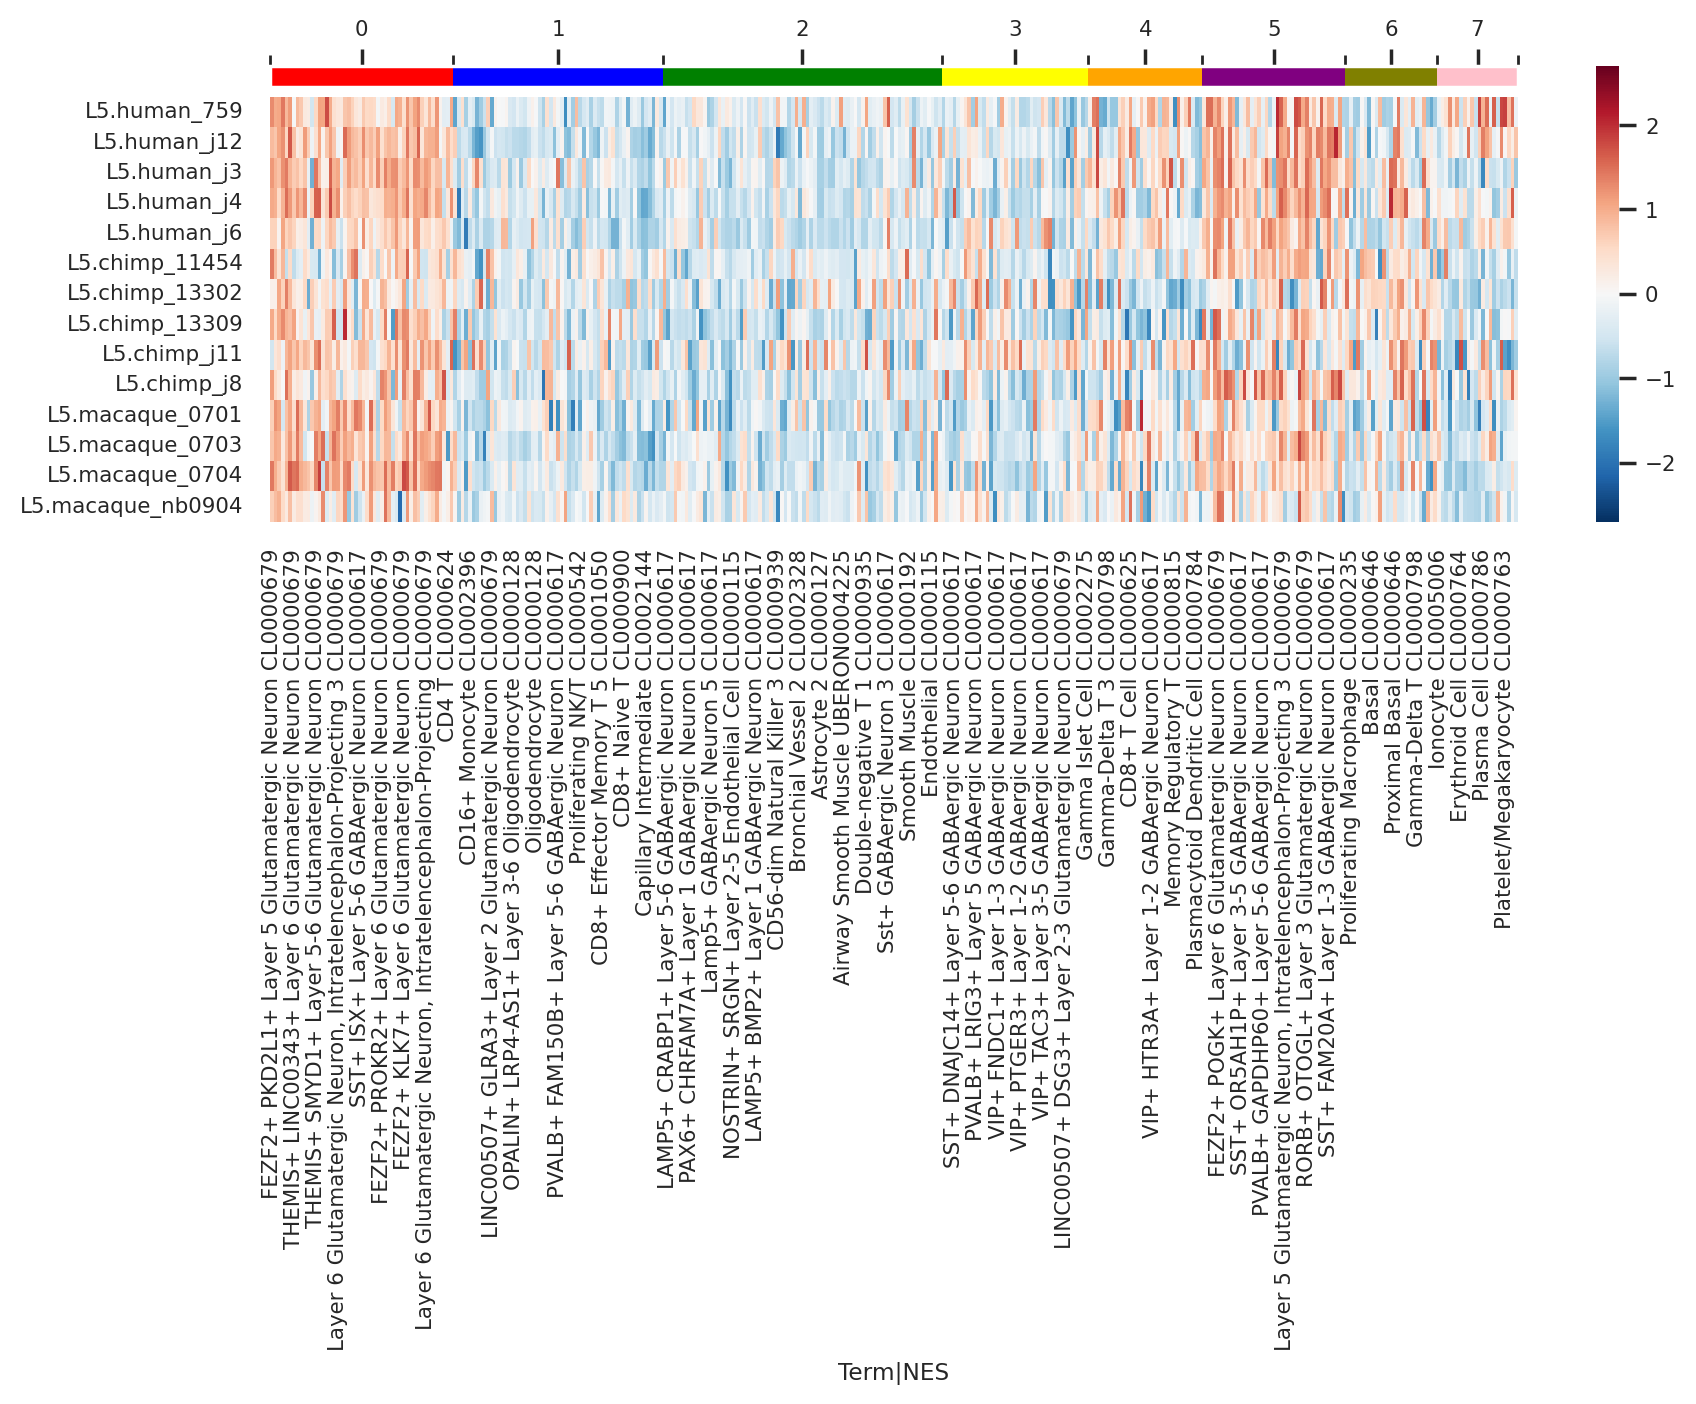

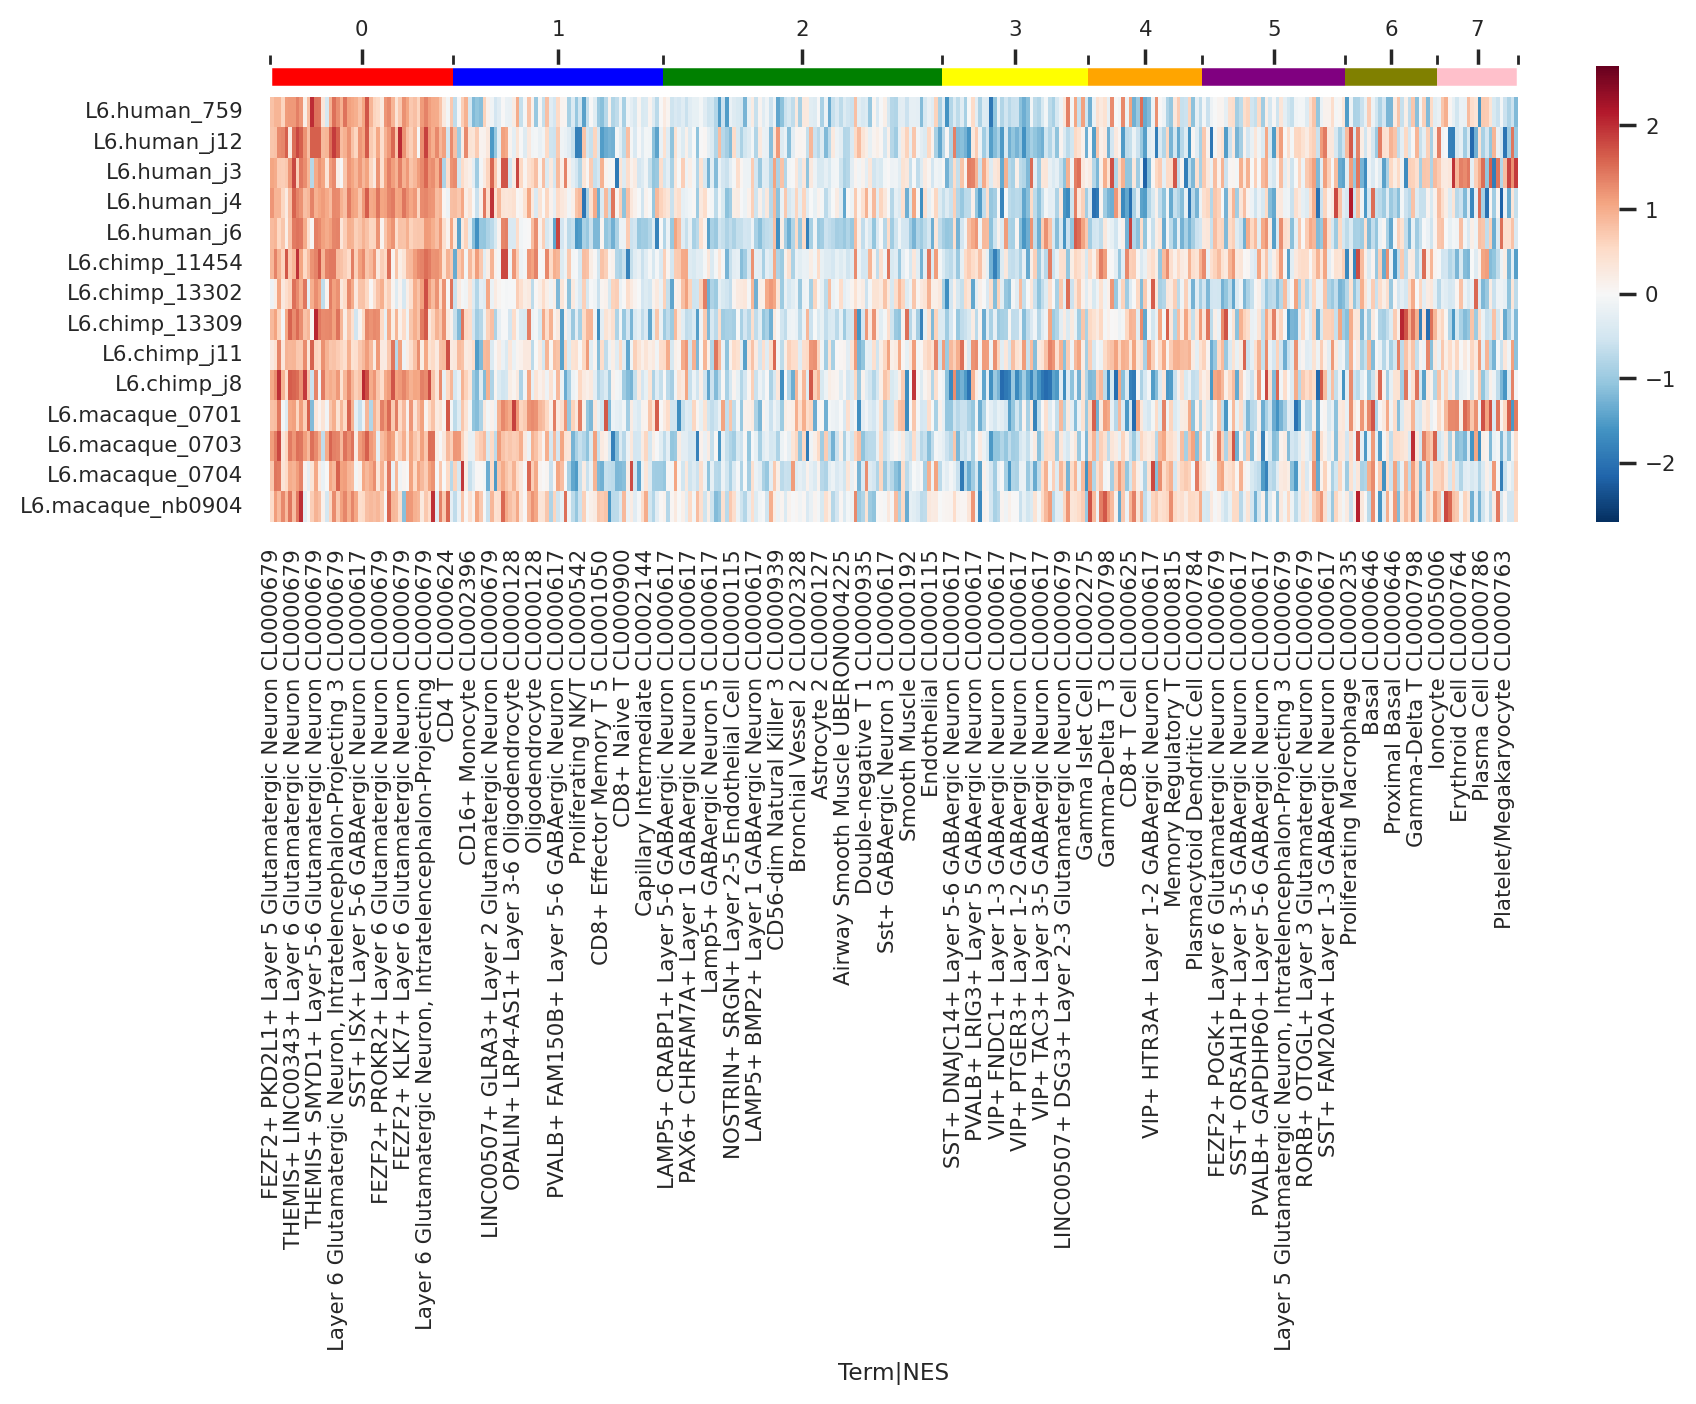

In [34]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

clusters = np.arange(8)

for layer in ['WM', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6']:
    fig, ax = plt.subplots(figsize=(10, 3), gridspec_kw={'hspace': 0})
    df_layer = df.loc[df.index.str.contains(layer)]
    sns.heatmap(df_layer.loc[:, order], ax=ax, cmap="RdBu_r", vmax=2.7, vmin=-2.7, center=0)
    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('top', size='5%', pad=0.05)
    cmap = mpl.colors.ListedColormap(['red', 'blue', 'green',  'yellow', 'orange', 'purple', 'olive', 'pink'])

    cluster_size = labels.value_counts().loc[clusters].values
    cluster_pos = cluster_size.cumsum()
    bounds = [0] + list(cluster_pos)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
        cax=cax,
        ticks=bounds,
        orientation='horizontal',
        spacing='proportional'
    )
    cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
    cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
    cax.xaxis.tick_top() 
    #plt.savefig(f'sample_data/heatmaps/heatmap_norm_hs_{layer}.png', bbox_inches='tight')

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


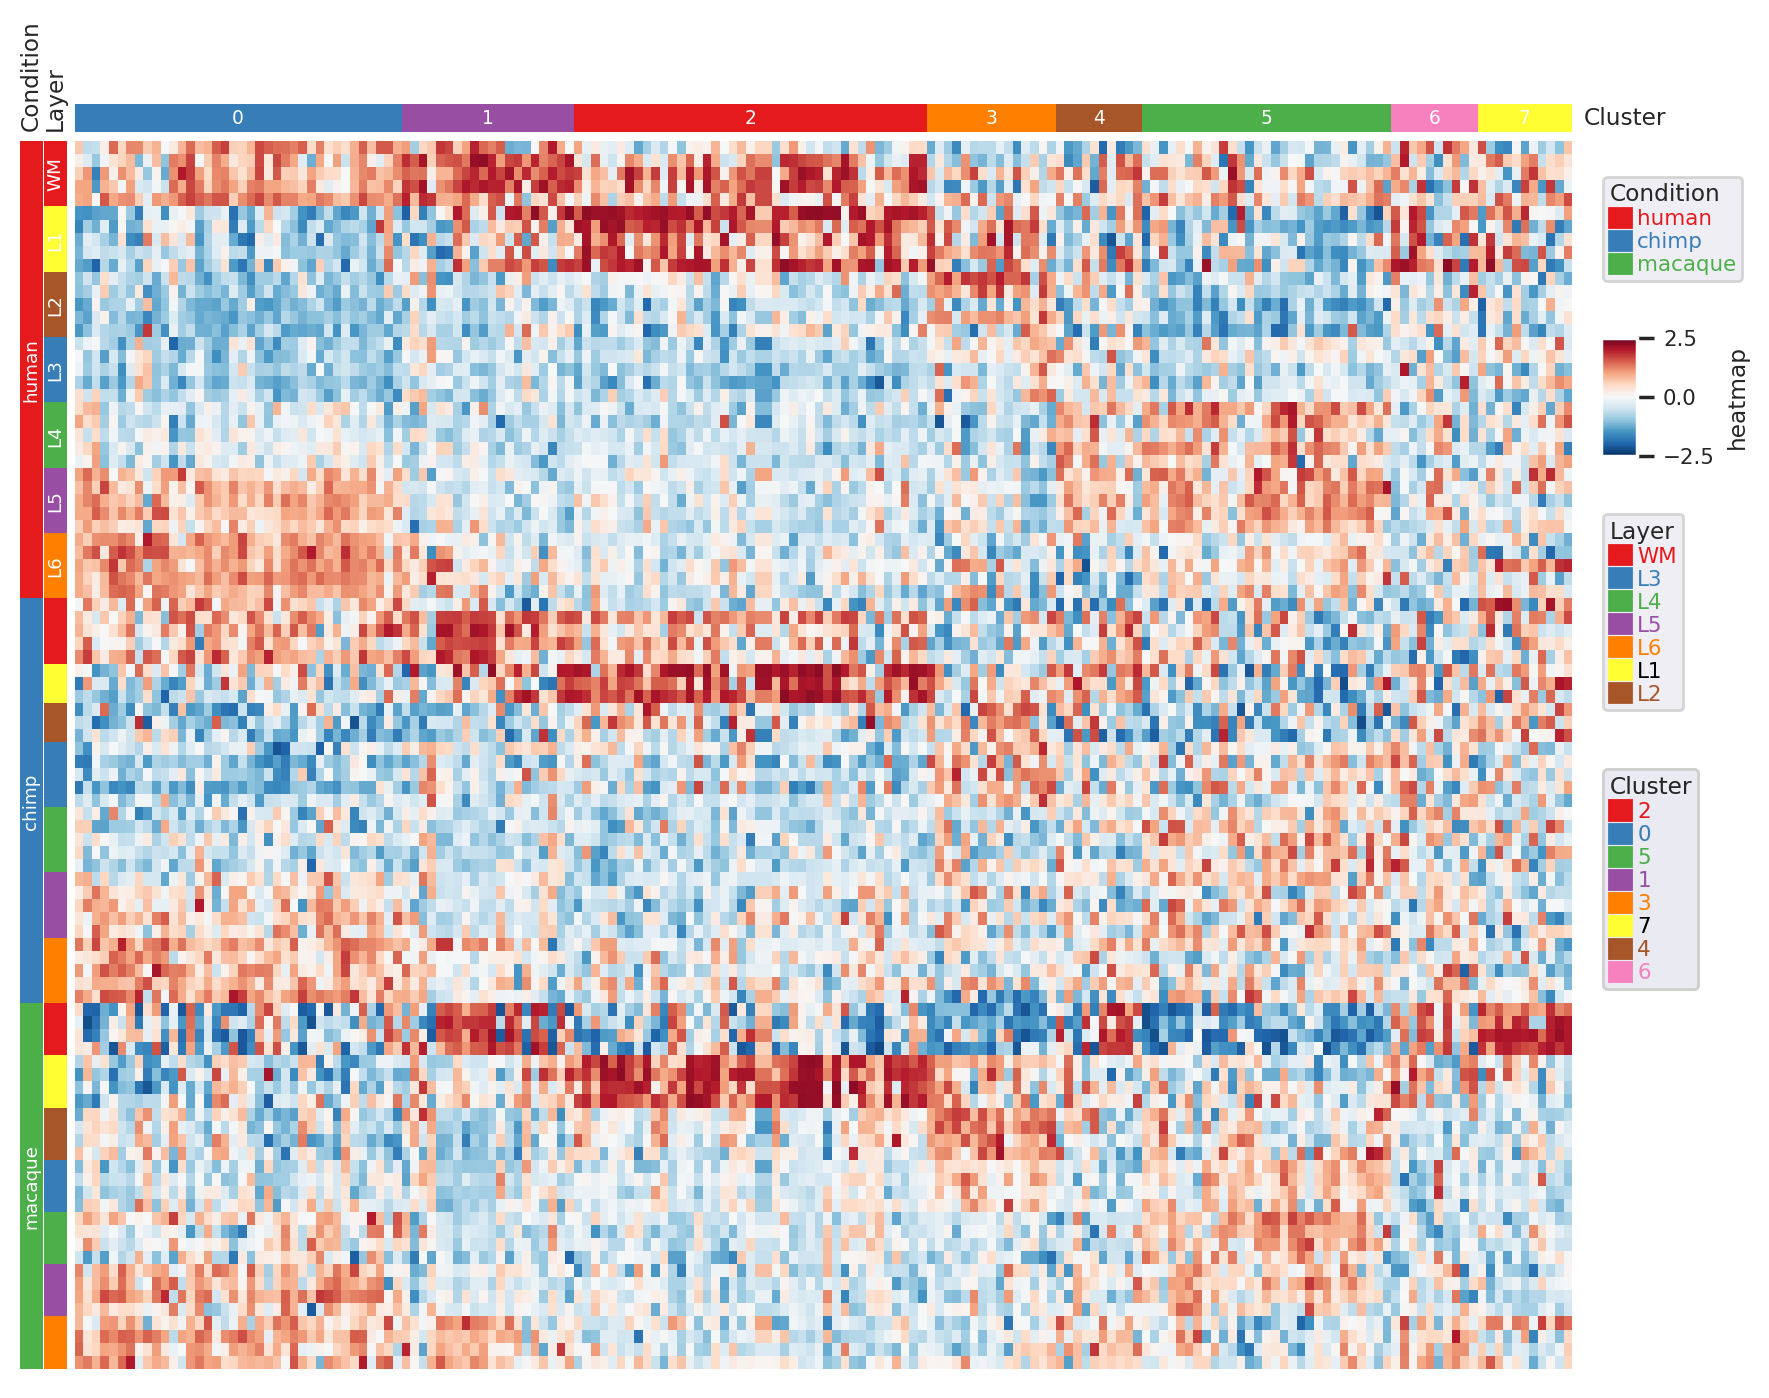

In [35]:
import PyComplexHeatmap as hm
from matplotlib.colors import LinearSegmentedColormap

col_ha = hm.HeatmapAnnotation(Cluster=hm.anno_simple(labels.loc[order & anova_cell_types].sort_values().astype(str), legend=True, add_text=True), axis=1)

row_ha = hm.HeatmapAnnotation(Condition=hm.anno_simple(adata_en.obs.condition.astype(str), legend=True, add_text=True),
                              Layer=hm.anno_simple(adata_en.obs.layer.astype(str), legend=True, add_text=True), axis=0)

plt.figure(figsize=(10, 7))
cm = hm.ClusterMapPlotter(data=df.loc[sample_order['all'], order & anova_cell_types], top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False, row_names_side='left',
                       cmap='RdBu_r', row_cluster=False, col_cluster=False,
                       rasterized=True, legend=True, legend_anchor='ax_heatmap', vmax=2.5, vmin=-2.5)
#legend_pad control the space between heatmap and legend.
plt.savefig(f"heatmap_spectr{n_clusters}_anova.png", bbox_inches='tight')
#plt.savefig("sample_data/heatmaps/heatmap_spectr_hs_ann.pdf", bbox_inches='tight')
plt.show()

In [36]:
adata_en.var

sum_sq    df         F  \
Term|NES                                                                
AXL+ Dendritic Cell CL0000451               12.651538  12.0  1.649240   
AXL+ Myeloid Dendritic Cell CL0000782       12.243486  12.0  1.813330   
AXL+ Plasmacytoid Dendritic Cell CL0000784   9.442357  12.0  0.891036   
Acinar CL0002064                            16.410512  12.0  1.946963   
Activated Stellate CL0002410                 5.746399  12.0  2.331796   
...                                               ...   ...       ...   
Vip+ GABAergic Neuron 1 CL0000617            7.691209  12.0  0.939209   
Vip+ GABAergic Neuron 2 CL0000617           18.928092  12.0  2.869609   
Vip+ GABAergic Neuron 3 CL0000617           16.792692  12.0  2.161600   
Vip+ GABAergic Neuron 4 CL0000617            4.553048  12.0  1.585246   
Vip+ GABAergic Neuron CL0000617             12.881915  12.0  1.577352   

                                              PR(>F)  p_val_adj  anova_sign  \
Term|NES                                                                      
AXL+ Dendritic Cell CL0000451               0.096825   0.141882       False   
AXL+ Myeloid Dendritic Cell CL0000782       0.061596   0.098807       False   
AXL+ Plasmacytoid Dendritic Cell CL0000784  0.559672   0.592799       False   
Acinar CL0002064                            0.042189   0.072814       False   
Activated Stellate CL0002410                0.013720   0.033680        True   
...                                              ...        ...         ...   
Vip+ GABAergic Neuron 1 CL0000617           0.513617   0.550883       False   
Vip+ GABAergic Neuron 2 CL0000617           0.002744   0.009147        True   
Vip+ GABAergic Neuron 3 CL0000617           0.022657   0.046238        True   
Vip+ GABAergic Neuron 4 CL0000617           0.114980   0.162888       False   
Vip+ GABAergic Neuron CL0000617             0.117420   0.164291       False   

                                            ttest_sign spectral_6  spectral_8  
Term|NES                                                                       
AXL+ Dendritic Cell CL0000451                    False          B           4  
AXL+ Myeloid Dendritic Cell CL0000782            False          B           4  
AXL+ Plasmacytoid Dendritic Cell CL0000784       False          D           4  
Acinar CL0002064                                 False          F           6  
Activated Stellate CL0002410                     False          A           2  
...                                                ...        ...         ...  
Vip+ GABAergic Neuron 1 CL0000617                False          E           3  
Vip+ GABAergic Neuron 2 CL0000617                False          E           3  
Vip+ GABAergic Neuron 3 CL0000617                False          E           3  
Vip+ GABAergic Neuron 4 CL0000617                False          E           3  
Vip+ GABAergic Neuron CL0000617                  False          E           3  

[340 rows x 9 columns]

<Axes: xlabel='spectral_8', ylabel='count'>

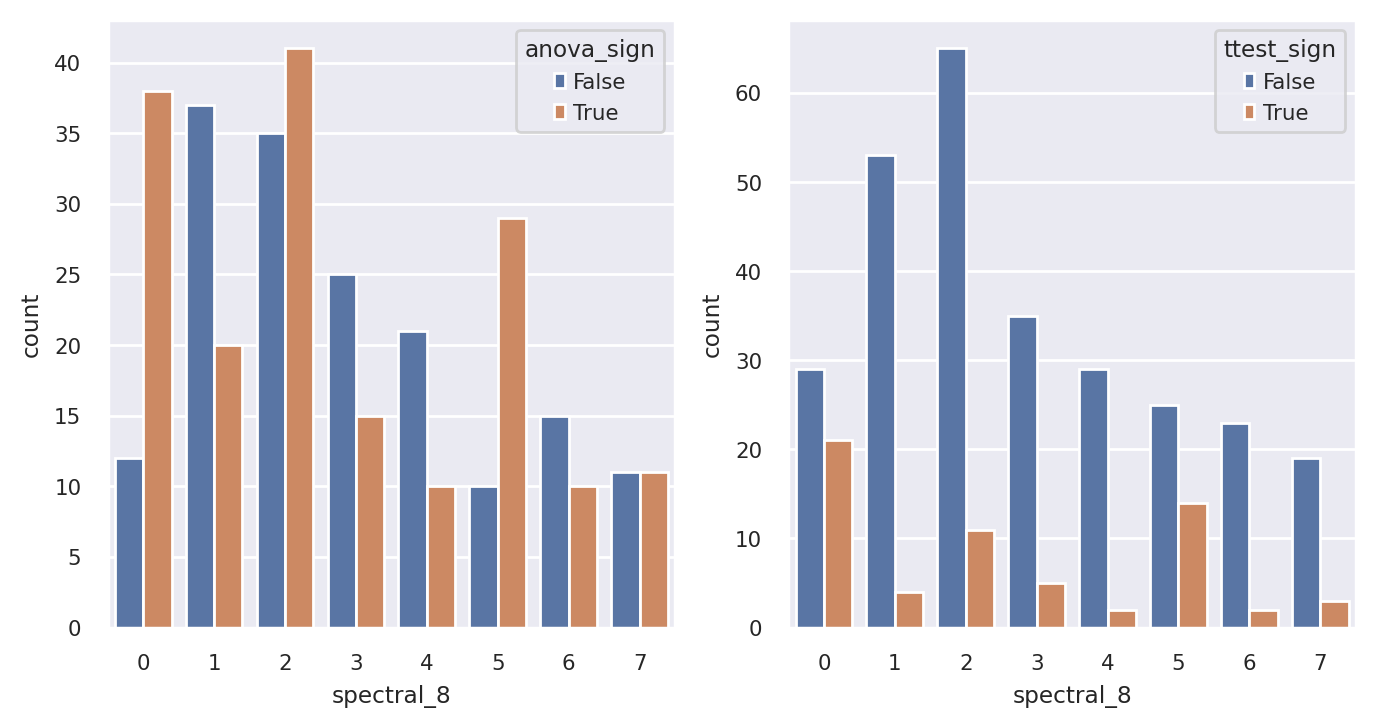

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=adata_en.var, x="spectral_8", hue='anova_sign', ax=ax[0])
sns.countplot(data=adata_en.var, x="spectral_8", hue='ttest_sign', ax=ax[1])